# Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study:
There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing NumPy and Pandas
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# 1. Loading the data

In [4]:
lead_df = pd.read_csv('Leads.csv')

In [5]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# 2. Inspecting the Dataframe

In [6]:
lead_df.shape

(9240, 37)

In [7]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# 3. Cleaning the dataframe

In [9]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**We can see there are some columns having a value as Select, which implicitly means those are NaN values.**

## 3.1 Replacing all the 'Select' values to NaN

**Lets first convert all the text to small case, so that we could handle all the cases like select,SELECT,etc. to replace**

In [10]:
# Converting all the values to lower case
lead_df = lead_df.applymap(lambda s:s.lower() if type(s) == str else s)

In [11]:
# Replacing select values to nan
lead_df = lead_df.replace('select',np.nan)

## 3.2 Handling missing values

**Defining a function to calculate null values in percentage format and return only columns having null values**

In [12]:
def null_value_percent_more_than_zero(df):
    null_values = df.isnull().sum()
    null_values = (null_values/df.shape[0])*100
    # returning the data in descending order of null value counts
    return null_values[null_values > 0].sort_values(ascending=False)

**Checking null values**

In [13]:
null_value_percent_more_than_zero(lead_df)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

### 3.2.1  Removing all the columns that are no required and have 35% or more null values

In [14]:
lead_df_cleaned = lead_df.drop(['How did you hear about X Education','Lead Quality','Lead Profile', 'Asymmetrique Profile Score'
                                ,'Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index',
                                'City','Tags'],axis=1)
lead_df_cleaned.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,NaN,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,student,better career prospects,no,no,no,no,no,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,NaN,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified


**We see that Specialization also has more than 35% null values (around 36.58) but we have not droped it, the reason being that specialization can help convert the lead, because then the sales team can focus on putting in more courses under that specialization to the lead.**

**Checking null values**

In [15]:
null_value_percent_more_than_zero(lead_df_cleaned)

Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

### 3.2.2 Handling missing values in `Specialization`

In [16]:
# Checking the value counts of Specialization
lead_df_cleaned.Specialization.value_counts()

finance management                   976
human resource management            848
marketing management                 838
operations management                503
business administration              403
it projects management               366
supply chain management              349
banking, investment and insurance    338
travel and tourism                   203
media and advertising                203
international business               178
healthcare management                159
hospitality management               114
e-commerce                           112
retail management                    100
rural and agribusiness                73
e-business                            57
services excellence                   40
Name: Specialization, dtype: int64

**One approach to impute Specialization can be to use mode, but since there are many missing values, imputing with mode will make the column biased, hence we can define one more category called as `Not Available` to avoid biasness.**

In [17]:
# Imputing with new category
lead_df_cleaned.Specialization.fillna('not available', inplace=True) 

In [18]:
# Checking the value counts again after imputation of Specialization
lead_df_cleaned.Specialization.value_counts()

not available                        3380
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

**Checking null values**

In [19]:
null_value_percent_more_than_zero(lead_df_cleaned)

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

### 3.2.3 Handling missing values in `What matters most to you in choosing a course`

In [20]:
lead_df_cleaned['What matters most to you in choosing a course'].value_counts()

better career prospects      6528
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [21]:
lead_df_cleaned['What matters most to you in choosing a course'].isnull().sum()

2709

**Here the data is already biased, so even if we impute the mode it will make sense, but the null values are large in number, hence we should make again a new category `not available`.**

In [22]:
# Imputing with new category
lead_df_cleaned['What matters most to you in choosing a course'].fillna('not available', inplace=True) 

In [23]:
# Checking the value counts again after imputation of Specialization
lead_df_cleaned['What matters most to you in choosing a course'].value_counts()

better career prospects      6528
not available                2709
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

**Checking null values**

In [24]:
null_value_percent_more_than_zero(lead_df_cleaned)

What is your current occupation    29.112554
Country                            26.634199
TotalVisits                         1.482684
Page Views Per Visit                1.482684
Last Activity                       1.114719
Lead Source                         0.389610
dtype: float64

### 3.2.4 Handling missing values in `What is your current occupation`

In [25]:
lead_df_cleaned['What is your current occupation'].value_counts()

unemployed              5600
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
lead_df_cleaned['What is your current occupation'].isnull().sum()

2690

**Here also the data is already biased, so even if we impute the mode it will make sense, but the null values are large in number, hence we should make again a new category `not available`.**

In [27]:
# Imputing with new category
lead_df_cleaned['What is your current occupation'].fillna('not available', inplace=True) 

In [28]:
# Checking the value counts again after imputation of Specialization
lead_df_cleaned['What is your current occupation'].value_counts()

unemployed              5600
not available           2690
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

**Checking null values**

In [29]:
null_value_percent_more_than_zero(lead_df_cleaned)

Country                 26.634199
TotalVisits              1.482684
Page Views Per Visit     1.482684
Last Activity            1.114719
Lead Source              0.389610
dtype: float64

### 3.2.5 Handling missing values in `Country`

In [30]:
lead_df_cleaned.Country.value_counts()

india                   6492
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
france                     6
oman                       6
unknown                    5
south africa               4
kuwait                     4
germany                    4
canada                     4
nigeria                    4
sweden                     3
ghana                      2
italy                      2
uganda                     2
bangladesh                 2
netherlands                2
philippines                2
china                      2
belgium                    2
asia/pacific region        2
switzerland                1
russia                     1
liberia                    1
denmark                    1
tanzania                   1
malaysia                   1
vietnam       

In [31]:
lead_df_cleaned.Country.isnull().sum()

2461

**Here also the data is already biased, so even if we impute the mode it will make sense, but the null values are large in number, hence we should make again a new category `not available`.**

In [32]:
# Imputing with new category
lead_df_cleaned.Country.fillna('not available', inplace=True) 

In [33]:
# Checking the value counts again after imputation of Specialization
lead_df_cleaned.Country.value_counts()

india                   6492
not available           2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
france                     6
oman                       6
unknown                    5
south africa               4
nigeria                    4
germany                    4
canada                     4
kuwait                     4
sweden                     3
netherlands                2
italy                      2
ghana                      2
uganda                     2
bangladesh                 2
asia/pacific region        2
china                      2
belgium                    2
philippines                2
switzerland                1
sri lanka                  1
russia                     1
liberia                    1
indonesia                  1
vietnam       

**Checking null values**

In [34]:
null_value_percent_more_than_zero(lead_df_cleaned)

TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
Lead Source             0.389610
dtype: float64

### 3.2.6 Handling missing values in `TotalVisits`

In [35]:
# Since TotalVisits is a numerical variable lets see some stats
lead_df_cleaned.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

**Lets impute the missing values with median**

In [36]:
lead_df_cleaned.TotalVisits.fillna(lead_df.TotalVisits.median(), inplace=True) 

**Checking null values**

In [37]:
null_value_percent_more_than_zero(lead_df_cleaned)

Page Views Per Visit    1.482684
Last Activity           1.114719
Lead Source             0.389610
dtype: float64

### 3.2.7 Handling missing values in `Page Views Per Visit`

In [38]:
# Since TotalVisits is a numerical variable lets see some stats
lead_df_cleaned['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

**Lets impute the missing values with median**

In [39]:
lead_df_cleaned['Page Views Per Visit'].fillna(lead_df['Page Views Per Visit'].median(), inplace=True) 

**Checking null values**

In [40]:
null_value_percent_more_than_zero(lead_df_cleaned)

Last Activity    1.114719
Lead Source      0.389610
dtype: float64

### 3.2.8 Handling missing values in `Last Activity`

In [41]:
# Chcking the value count of Last Activity
lead_df_cleaned['Last Activity'].value_counts()

email opened                    3437
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email marked spam                  2
email received                     2
resubscribed to emails             1
visited booth in tradeshow         1
Name: Last Activity, dtype: int64

**Lets impute the missing values with mode**

In [42]:
lead_df_cleaned['Last Activity'].fillna(lead_df['Last Activity'].mode()[0], inplace=True) 

In [43]:
# Chcking the value count of Last Activity again
lead_df_cleaned['Last Activity'].value_counts()

email opened                    3540
sms sent                        2745
olark chat conversation          973
page visited on website          640
converted to lead                428
email bounced                    326
email link clicked               267
form submitted on website        116
unreachable                       93
unsubscribed                      61
had a phone conversation          30
approached upfront                 9
view in browser link clicked       6
email marked spam                  2
email received                     2
resubscribed to emails             1
visited booth in tradeshow         1
Name: Last Activity, dtype: int64

**Checking null values**

In [44]:
null_value_percent_more_than_zero(lead_df_cleaned)

Lead Source    0.38961
dtype: float64

### 3.2.9 Handling missing values in `Lead Source`

In [45]:
# Chcking the value count of Last Activity
lead_df_cleaned['Lead Source'].value_counts()

google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
press_release           2
live chat               2
social media            2
pay per click ads       1
nc_edm                  1
youtubechannel          1
testone                 1
welearnblog_home        1
welearn                 1
blog                    1
Name: Lead Source, dtype: int64

**Lets impute the missing values with mode**

In [46]:
lead_df_cleaned['Lead Source'].fillna(lead_df['Lead Source'].mode()[0], inplace=True) 

In [47]:
# Chcking the value count of Last Activity again
lead_df_cleaned['Lead Source'].value_counts()

google               2909
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
press_release           2
live chat               2
social media            2
pay per click ads       1
nc_edm                  1
youtubechannel          1
testone                 1
welearnblog_home        1
welearn                 1
blog                    1
Name: Lead Source, dtype: int64

**Checking null values**

In [48]:
null_value_percent_more_than_zero(lead_df_cleaned)

Series([], dtype: float64)

**All the null values handled now.**

### 3.2.10 Cleaning the country column one more level deep

In [49]:
lead_df_cleaned.Country.value_counts()

india                   6492
not available           2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
france                     6
oman                       6
unknown                    5
south africa               4
nigeria                    4
germany                    4
canada                     4
kuwait                     4
sweden                     3
netherlands                2
italy                      2
ghana                      2
uganda                     2
bangladesh                 2
asia/pacific region        2
china                      2
belgium                    2
philippines                2
switzerland                1
sri lanka                  1
russia                     1
liberia                    1
indonesia                  1
vietnam       

**As we can see mostly the leads are from India, rest all countries have low number of leads, also when we will create the dummy variables for this column then there will be many dummy columns created. Instead we can split the country column into 3 categories : `india`, `foreign` and `not available`and therefore it will reduce the number of dummy variables by a large factor, while retaining the information.**

In [50]:
# defining a function to map the country
def country_values(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not available":
        category = "not available"
    else:
        category = "foreign"
    return category

In [51]:
lead_df_cleaned['Country'] = lead_df_cleaned.apply(lambda x:country_values(x['Country']), axis = 1)
lead_df_cleaned['Country'].value_counts()

india            6492
not available    2461
foreign           287
Name: Country, dtype: int64

# 4. Exploratory Data Analysis

In [52]:
lead_df_cleaned.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not available,not available,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,not available,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,student,better career prospects,no,no,no,no,no,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,not available,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified


## 4.1 Categorial Variables Univariate Analysis

### 4.1.1 Distribution of Lead Origin

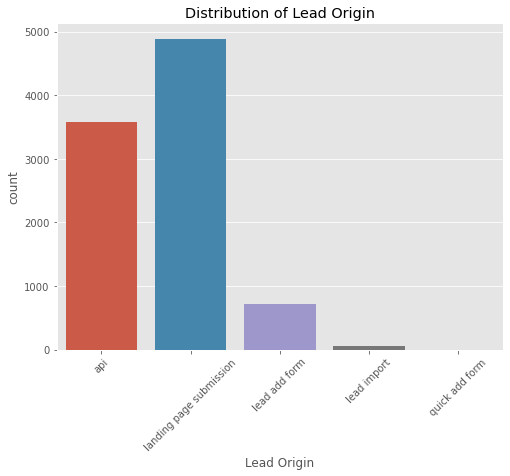

In [53]:
plt.figure(figsize = (8,6))
sns.countplot(lead_df_cleaned['Lead Origin'])
plt.title('Distribution of Lead Origin')
plt.xlabel('Lead Origin')
plt.xticks(rotation=45)
plt.show()

**Most of the leads have originated by landing page submission, followed by api, lead add form and so on.**

### 4.1.2 Distribution of Do Not Email

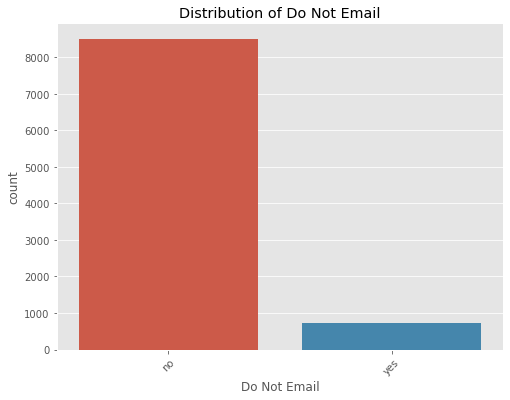

In [54]:
plt.figure(figsize = (8,6))
sns.countplot(lead_df_cleaned['Do Not Email'])
plt.title('Distribution of Do Not Email')
plt.xlabel('Do Not Email')
plt.xticks(rotation=45)
plt.show()

**Most of the leads do not want to be mailed about the course.**

### 4.1.3 Distribution of Do Not Call

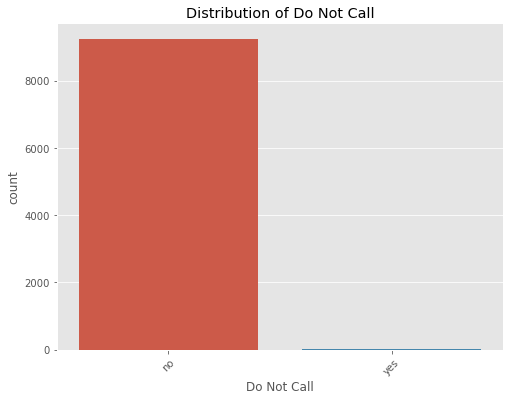

In [55]:
plt.figure(figsize = (8,6))
sns.countplot(lead_df_cleaned['Do Not Call'])
plt.title('Distribution of Do Not Call')
plt.xlabel('Do Not Call')
plt.xticks(rotation=45)
plt.show()

**Again most of the leads do not want to be called about the course.**

### 4.1.4 Distribution of Country

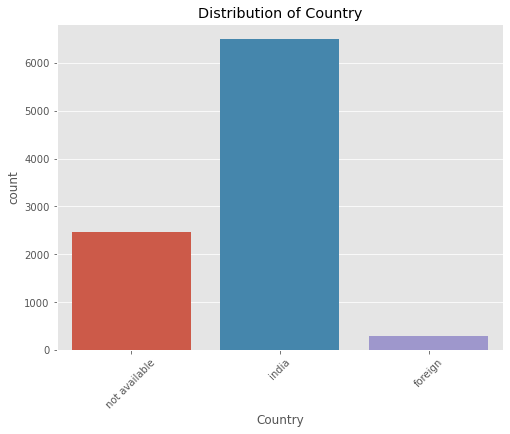

In [56]:
plt.figure(figsize = (8,6))
sns.countplot(lead_df_cleaned['Country'])
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

**Most of the leads are from India and also there are many leads who have not provided the details about there country.**

### 4.1.5 Distribution of Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Magazine

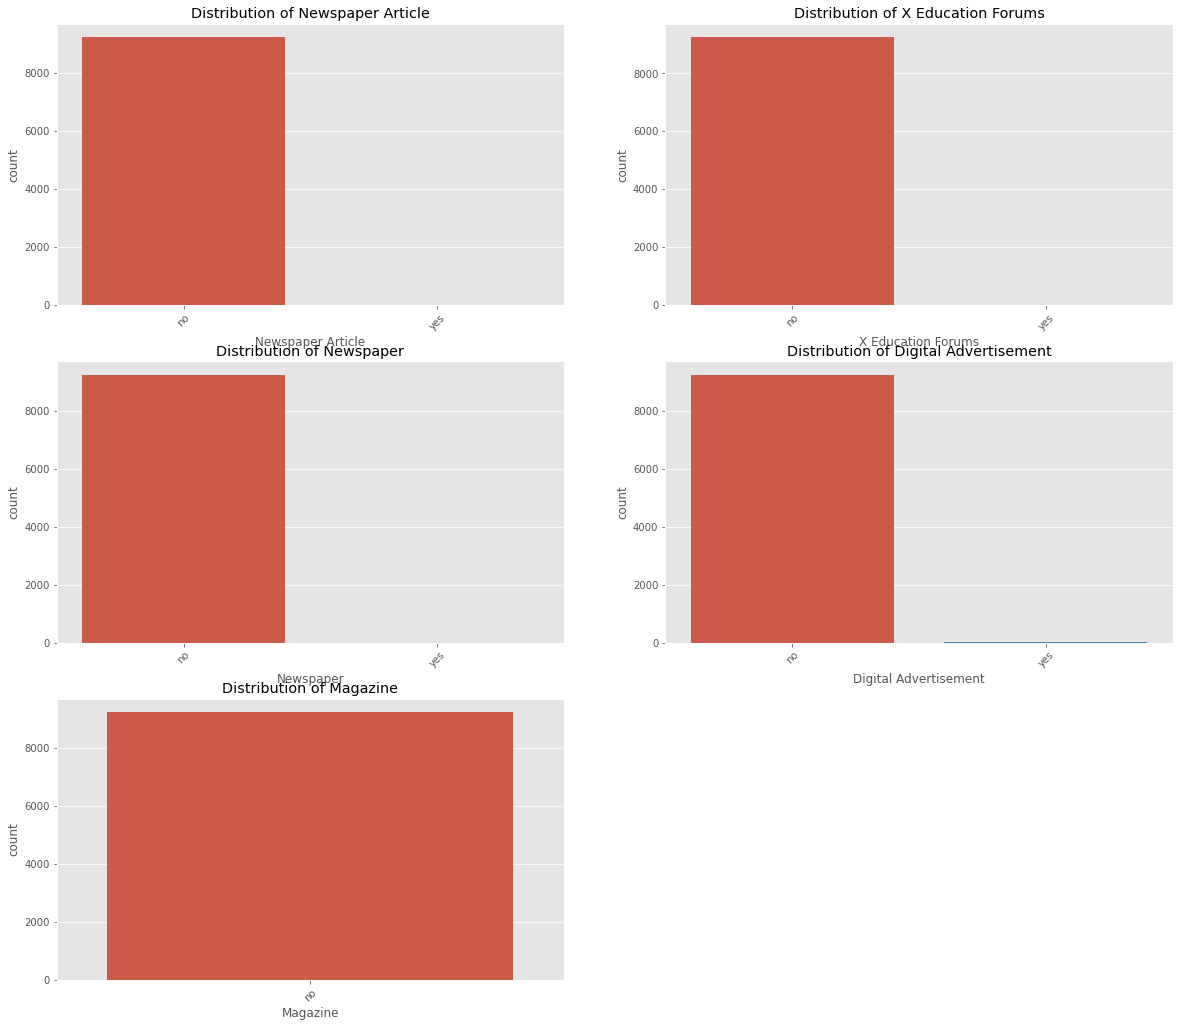

In [57]:
plt.figure(figsize = (20,30))

plt.subplot(5,2,1)
sns.countplot(lead_df_cleaned['Newspaper Article'])
plt.title('Distribution of Newspaper Article')
plt.xlabel('Newspaper Article')
plt.xticks(rotation=45)

plt.subplot(5,2,2)
sns.countplot(lead_df_cleaned['X Education Forums'])
plt.title('Distribution of X Education Forums')
plt.xlabel('X Education Forums')
plt.xticks(rotation=45)

plt.subplot(5,2,3)
sns.countplot(lead_df_cleaned['Newspaper'])
plt.title('Distribution of Newspaper')
plt.xlabel('Newspaper')
plt.xticks(rotation=45)

plt.subplot(5,2,4)
sns.countplot(lead_df_cleaned['Digital Advertisement'])
plt.title('Distribution of Digital Advertisement')
plt.xlabel('Digital Advertisement')
plt.xticks(rotation=45)

plt.subplot(5,2,5)
sns.countplot(lead_df_cleaned['Magazine'])
plt.title('Distribution of Magazine')
plt.xlabel('Magazine')
plt.xticks(rotation=45)

plt.show()

**Most of the leads have not seen any of the ad listed in Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement.**

### 4.1.6 Distribution of Through Recommendations

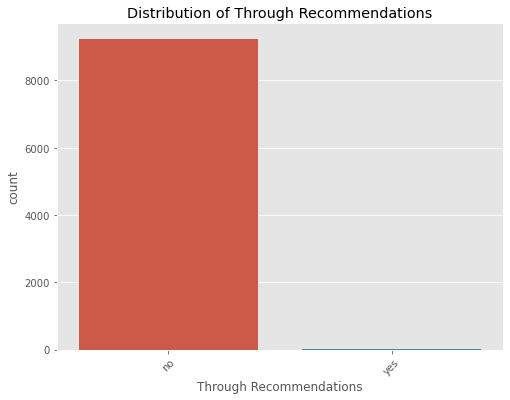

In [58]:
plt.figure(figsize = (8,6))
sns.countplot(lead_df_cleaned['Through Recommendations'])
plt.title('Distribution of Through Recommendations')
plt.xlabel('Through Recommendations')
plt.xticks(rotation=45)
plt.show()

**Mostly the leads did not came Through Recommendations.**

### 4.1.7 Distribution of whether the lead wants a free copy of Mastering The Interview

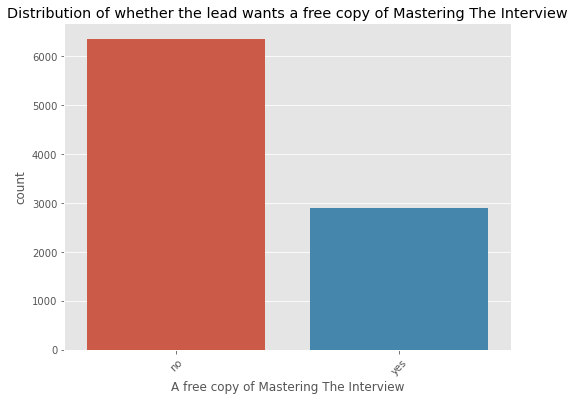

In [59]:
plt.figure(figsize = (8,6))
sns.countplot(lead_df_cleaned['A free copy of Mastering The Interview'])
plt.title('Distribution of whether the lead wants a free copy of Mastering The Interview')
plt.xlabel('A free copy of Mastering The Interview')
plt.xticks(rotation=45)
plt.show()

**Most of the customer do not want a free copy of mastering the interview, but there are some leads wo want this, probably they are looking for new career oportunities.**

### 4.1.8 Distribution of Last Notable Activity of the lead

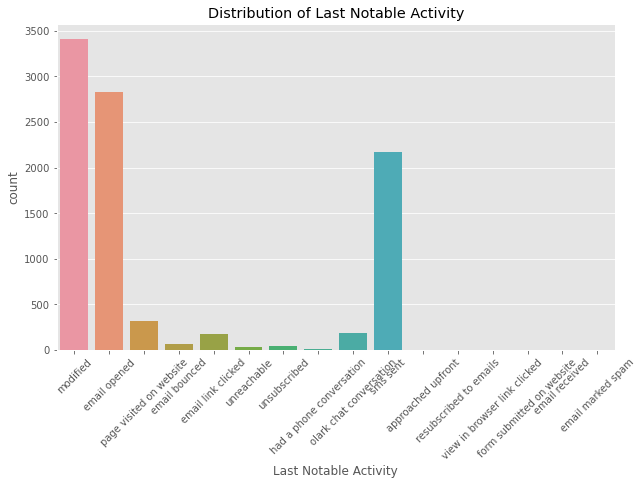

In [60]:
plt.figure(figsize = (10,6))
sns.countplot(lead_df_cleaned['Last Notable Activity'])
plt.title('Distribution of Last Notable Activity')
plt.xlabel('Last Notable Activity')
plt.xticks(rotation=45)
plt.show()

**Most of the leads modified their account as a last activity followed by opening the email and doing a chat conversation, probably with a chatbot.**

### 4.1.8 Distribution of Lead Source

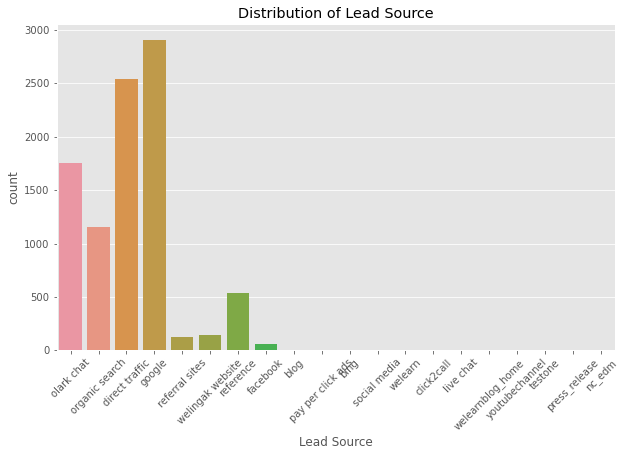

In [61]:
plt.figure(figsize = (10,6))
sns.countplot(lead_df_cleaned['Lead Source'])
plt.title('Distribution of Lead Source')
plt.xlabel('Lead Source')
plt.xticks(rotation=45)
plt.show()

**Most of the leads are generated from Google followed by organic search, olark chat and so on.**

### 4.1.9 Distributon of Specialization, Current Occupation, Motivation for course and Last activity|

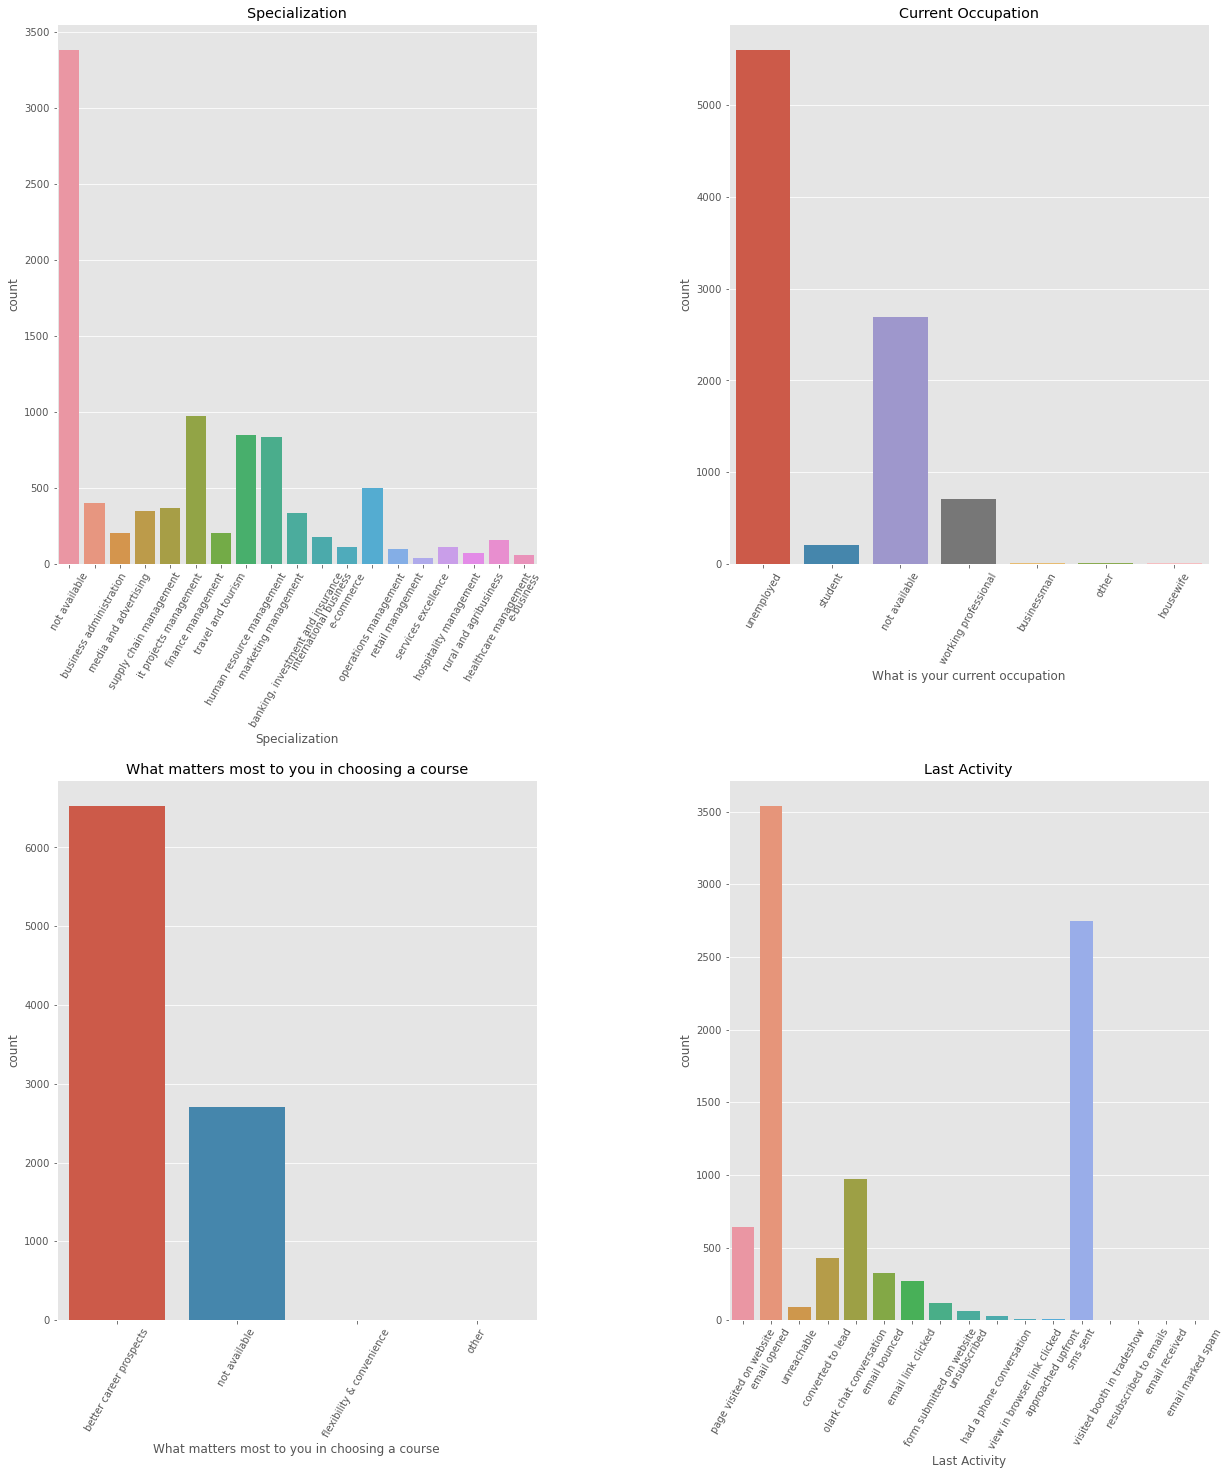

In [62]:
plt.figure(figsize = (20,20))

# plot for distribution of Specialization
plt.subplot(2,2,1)
sns.countplot(lead_df_cleaned['Specialization']).tick_params(axis='x', rotation = 60)
plt.title('Specialization')

# plot for distribution of Current Occupation
plt.subplot(2,2,2)
sns.countplot(lead_df_cleaned['What is your current occupation']).tick_params(axis='x', rotation = 60)
plt.title('Current Occupation')

# plot for distribution of reason for choosing course
plt.subplot(2,2,3)
sns.countplot(lead_df_cleaned['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 60)
plt.title('What matters most to you in choosing a course')

# plot for distribution of Last activity
plt.subplot(2,2,4)
sns.countplot(lead_df_cleaned['Last Activity']).tick_params(axis='x', rotation = 60)
plt.title('Last Activity')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

- **As seen most of the leads have not provided the specialization values, ignoring this if we see there are most of the leads having a specialization of It Project Managment followed by Travel and Tourism and HR Management.**
- **Most of the leads are unemployed and many of them have not provided there employment status.**
- **Generally the leads want to take a course for better career prospects.**
- **Most of the leads have visited a page on website as a last activity followd by sms sent.**

## 4.2 Numerical Variables Univariate Analysis

### 4.2.1 Distribution of TotalVisits

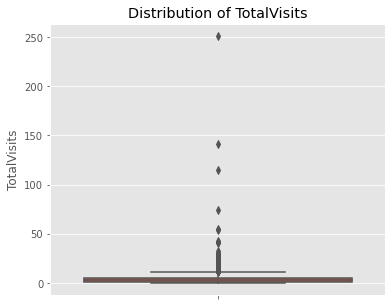

In [63]:
plt.figure(figsize=(6,5))
sns.boxplot(y=lead_df_cleaned['TotalVisits'])
plt.title('Distribution of TotalVisits')
plt.show()

- **We can see there are outliers.**

#### Checking percentile values for Total Visits

In [64]:
lead_df_cleaned['TotalVisits'].describe(percentiles=[0.01,0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

**As clearly visible there is a large jump from 99th percentile to max value which clearly means that there are otliers between 99th percentile and max value.**

#### Caping the top 1% values to the 99th quantile

In [65]:
lead_df_cleaned['TotalVisits'] = np.where(lead_df_cleaned['TotalVisits']>17,17,lead_df_cleaned['TotalVisits'])

In [66]:
# checking the quantiles again
lead_df_cleaned['TotalVisits'].describe(percentiles=[0.01,0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        3.327814
std         3.228466
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max        17.000000
Name: TotalVisits, dtype: float64

#### Lets see the box plot again

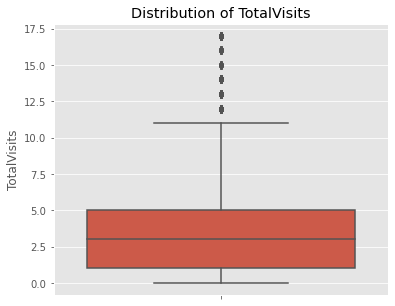

In [67]:
plt.figure(figsize=(6,5))
sns.boxplot(y=lead_df_cleaned['TotalVisits'])
plt.title('Distribution of TotalVisits')
plt.show()

**We still see some points out of the upper whisker, but as we have seen the quantiles this are not actually outliers.**

### 4.2.2 Distribution of Total Time Spent on Website

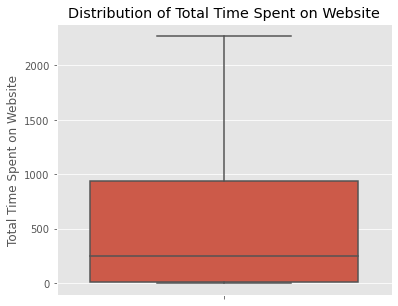

In [68]:
plt.figure(figsize=(6,5))
sns.boxplot(y=lead_df_cleaned['Total Time Spent on Website'])
plt.title('Distribution of Total Time Spent on Website')
plt.show()

- **There are no outliers in the Total Time Spent on Website.**

### 4.2.3 Distribution of Page Views Per Visit

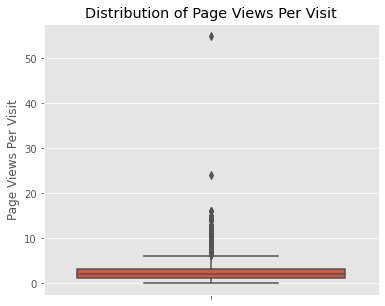

In [69]:
plt.figure(figsize=(6,5))
sns.boxplot(y=lead_df_cleaned['Page Views Per Visit'])
plt.title('Distribution of Page Views Per Visit')
plt.show()

- **Again there looks like some outliers in this column..**

#### Checking the quantiles of Page Views Per Visit

In [70]:
lead_df_cleaned['Page Views Per Visit'].describe(percentiles=[0.01,0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

#### Caping the values beyond 99th percentile to 99th percentile

In [71]:
q3 = lead_df_cleaned['Page Views Per Visit'].quantile(0.99)
lead_df_cleaned['Page Views Per Visit'] = np.where(lead_df_cleaned['Page Views Per Visit']>q3, q3, 
                                                   lead_df_cleaned['Page Views Per Visit'])

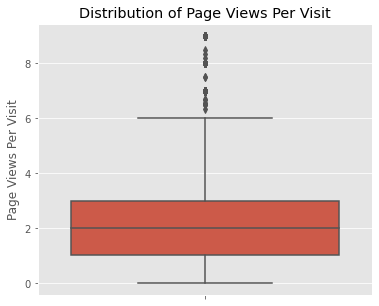

In [72]:
# lets see the distribution again
plt.figure(figsize=(6,5))
sns.boxplot(y=lead_df_cleaned['Page Views Per Visit'])
plt.title('Distribution of Page Views Per Visit')
plt.show()

In [73]:
# Checking the quantiles again
lead_df_cleaned['Page Views Per Visit'].describe(percentiles=[0.01,0.05,.25, .5, .75, .90, .95, .99])

count    9240.000000
mean        2.329050
std         1.971347
min         0.000000
1%          0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

- **From box plot it still seems there are outliers, but if we see the quantiles the growth is steady and hence there are no outliers left now.**

## 4.3 Categorical Variables Bivariate Analysis

### 4.3.1 DIstribution of Lead Origin and Lead Source with  respect to Converted(Target)

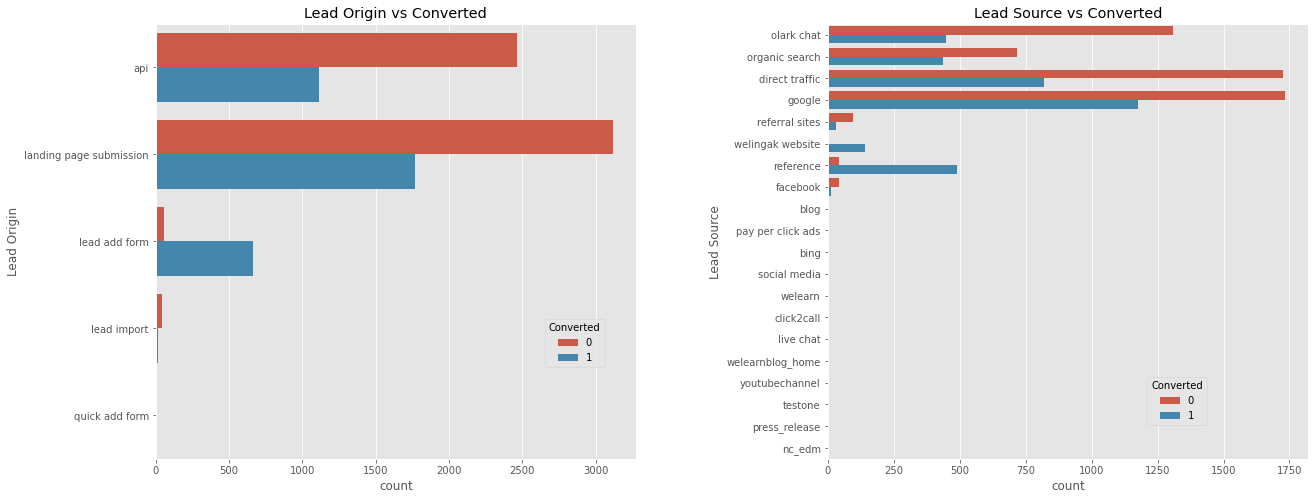

In [74]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
sns.countplot(y='Lead Origin', hue='Converted', data= lead_df_cleaned)
plt.title('Lead Origin vs Converted')
plt.legend(bbox_to_anchor=(0.8, 0.2), title='Converted')

plt.subplot(1,2,2)
sns.countplot(y='Lead Source', hue='Converted', data= lead_df_cleaned)
plt.title('Lead Source vs Converted')
plt.legend(bbox_to_anchor=(0.8, 0.2), title='Converted')

plt.subplots_adjust(left=0.1, 
                    right=0.9,
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

- **Most of the Leads originating from Landing Page Submission are successfully converted followed by those originating from api.**
- **Also there are a large number of leads who came through Google are converted followed by direct trafic, olark chat and organic search.**

### 4.3.2 Distribution of Specialization with respect to Converted(Target)

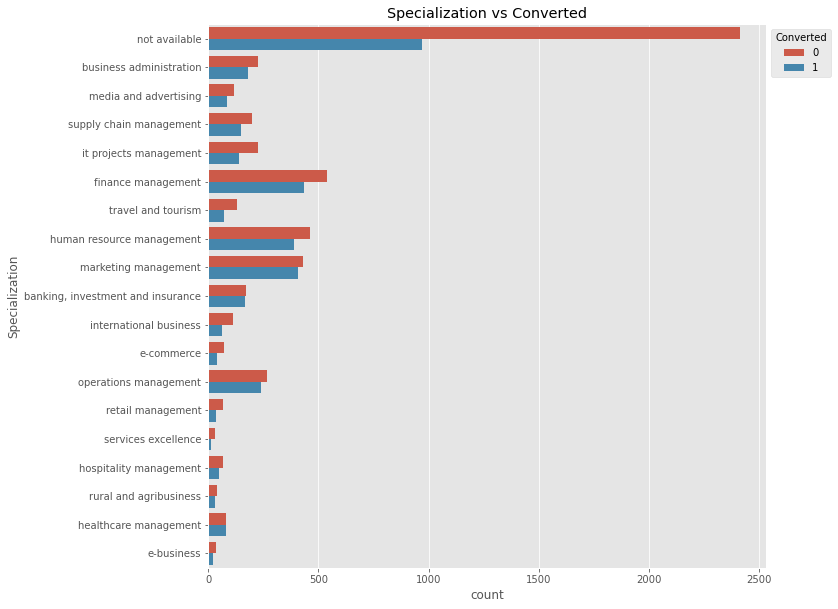

In [75]:
plt.figure(figsize = (10,10))
sns.countplot(y='Specialization', hue='Converted', data= lead_df_cleaned)
plt.title('Specialization vs Converted')
plt.legend(bbox_to_anchor=(1,1), title='Converted')
plt.show()

**We see that specialization with Management in them have higher number of leads as well as leads converted. Also there are many leads who have not specified their specialization but actually lot of them converted.**

### 4.3.3 Distribution of Current Occupation and What matters most to you in choosing a course with respect to Converted(Target)

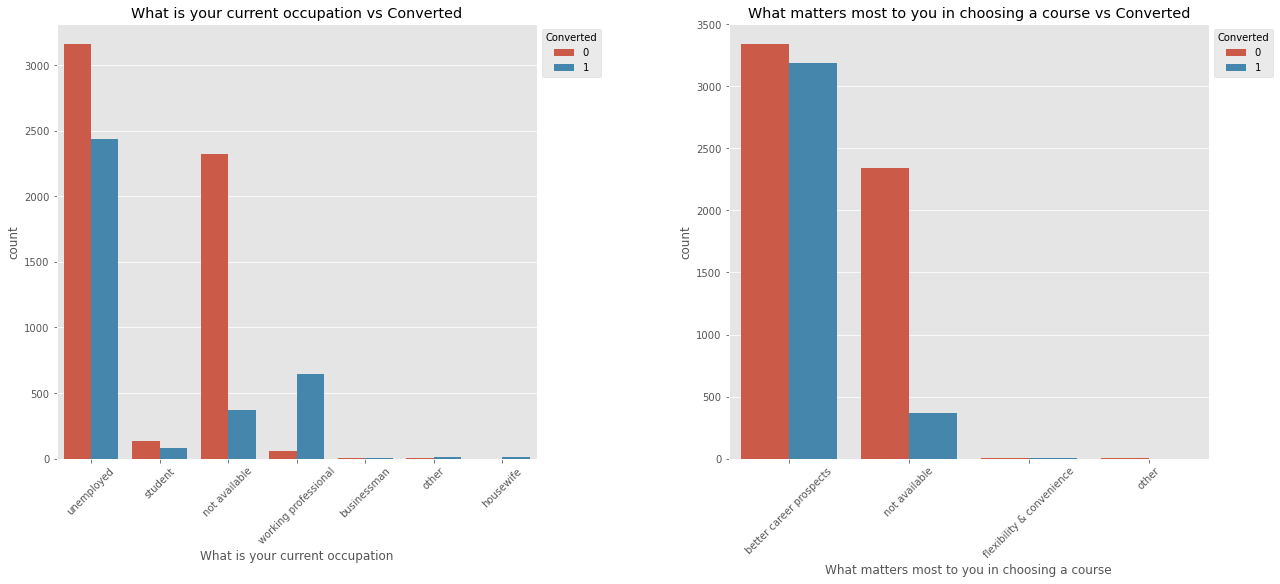

In [76]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_df_cleaned)
plt.title('What is your current occupation vs Converted')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1), title='Converted')

plt.subplot(1,2,2)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead_df_cleaned)
plt.title('What matters most to you in choosing a course vs Converted')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1, 1), title='Converted')

plt.subplots_adjust(left=0.1, 
                    right=0.9,
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

- **Most tof the leads who are unemployed have high conversion rate, probably because they might be students or someone who is looking for a job opportunity by taking in the course.**
- **Also most of the leads are looking for better career oportunities.**

### 4.3 .Distribution of Last Activity and Last Notable Activity with respect to Converted(Target)

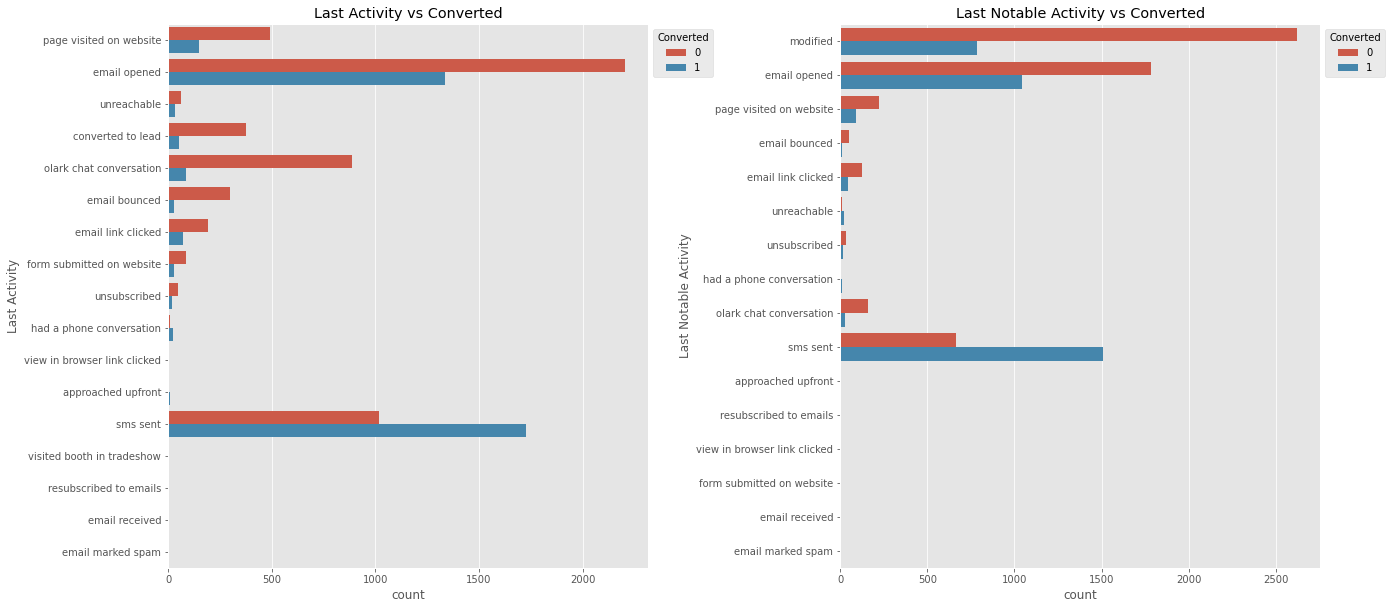

In [77]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(y='Last Activity', hue='Converted', data= lead_df_cleaned)
plt.title('Last Activity vs Converted')
plt.legend(bbox_to_anchor=(1, 1), title='Converted')

plt.subplot(1,2,2)
sns.countplot(y='Last Notable Activity', hue='Converted', data= lead_df_cleaned)
plt.title('Last Notable Activity vs Converted')
plt.legend(bbox_to_anchor=(1, 1), title='Converted')

plt.subplots_adjust(left=0.1, 
                    right=0.9,
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

- **Large number of leads who has the last activity and last notable activity of sms sent have been converted followed by email opened.**

## 4.4 Numerical Variables Bivariate Analysis

### 4.4.1 Distribution of TotalVisits, Total Time Spent on Website and Page Views Per Visit against Converted(Target)

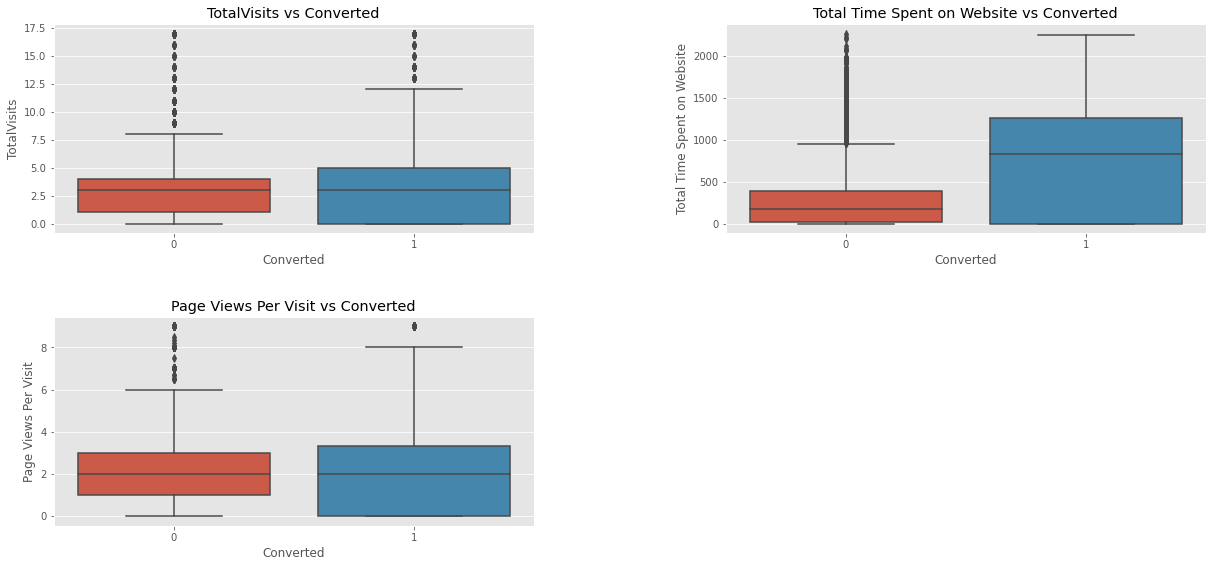

In [78]:
plt.figure(figsize = (20,20))

plt.subplot(4,2,1)
sns.boxplot(y='TotalVisits', x='Converted', data= lead_df_cleaned)
plt.title('TotalVisits vs Converted')

plt.subplot(4,2,2)
sns.boxplot(y='Total Time Spent on Website', x='Converted', data= lead_df_cleaned)
plt.title('Total Time Spent on Website vs Converted')

plt.subplot(4,2,3)
sns.boxplot(y='Page Views Per Visit', x='Converted', data= lead_df_cleaned)
plt.title('Page Views Per Visit vs Converted')

plt.subplots_adjust(left=0.1, 
                    right=0.9,
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

- **Median for converted and not converted leads are the close for `TotalVisits`. Nothng conclusive can be said on the basis of `Total Visits` about lead conversion.**
- **Leads spending more time on the website are more likely to be converted.Website should be made more engaging to make leads spend more time.**
- **Median for converted and unconverted leads is the same for `Page Views Per Visit`. Nothing can be said specifically for lead conversion from Page Views Per Visit**

### 4.4.2 Correlation of the numerical varibles

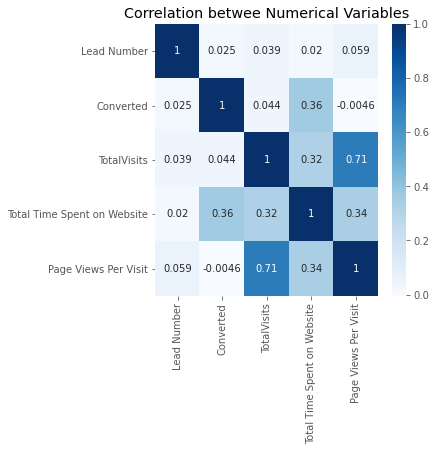

In [79]:
plt.figure(figsize=[5,5])
sns.heatmap(lead_df_cleaned.corr(), annot=True, cmap='Blues')
plt.title('Correlation betwee Numerical Variables')
plt.show()

- **We see few patches of notable correlation, ther are correlation between:** 
    - Page Views Per Visit and TotalVists
    - Page Views Per Visit and Total Time Spent on Website
    - Total Time Spent on Website nd TotalVisits

**Now all this are self explanatory as the more the lead visists the website the more he will spend time and view pages.**

# 5. Data Preparation

In [80]:
# checking data frame
lead_df_cleaned.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not available,not available,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,email opened,india,not available,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,business administration,student,better career prospects,no,no,no,no,no,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,media and advertising,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,not available,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified


### Checking all categorical variable columns

In [81]:
categorical_columns = lead_df_cleaned.select_dtypes(include=['object']).columns
categorical_columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

### Lets see the data for this columns

In [82]:
lead_df_cleaned[categorical_columns].head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,page visited on website,not available,not available,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,email opened,india,not available,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,email opened,india,business administration,student,better career prospects,no,no,no,no,no,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,unreachable,india,media and advertising,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,converted to lead,india,not available,unemployed,better career prospects,no,no,no,no,no,no,no,no,no,no,no,no,modified


## 5.1 Encoding binary variables

In [83]:
binary_columns = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper'
                  ,'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                  'A free copy of Mastering The Interview']
lead_df_cleaned[binary_columns].head()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,no,no,no,no,no,no,no,no,no,no,no,no,no,no
1,no,no,no,no,no,no,no,no,no,no,no,no,no,no
2,no,no,no,no,no,no,no,no,no,no,no,no,no,yes
3,no,no,no,no,no,no,no,no,no,no,no,no,no,no
4,no,no,no,no,no,no,no,no,no,no,no,no,no,no


### Defining the map function

In [84]:
def map_binary(x):
    return x.map({'yes': 1, "no": 0})

In [85]:
# Applying binary mapping to binary variables
lead_df_cleaned[binary_columns] = lead_df_cleaned[binary_columns].apply(map_binary)
lead_df_cleaned[binary_columns].head()

,Do Not Email,Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 5.2 Dummy Encoding for non-binary Categorical Variables

In [86]:
lead_df_cleaned[categorical_columns].head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,0,0,page visited on website,not available,not available,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,0,0,email opened,india,not available,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,0,0,email opened,india,business administration,student,better career prospects,0,0,0,0,0,0,0,0,0,0,0,1,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,0,0,unreachable,india,media and advertising,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,0,0,converted to lead,india,not available,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified


### 5.2.1 Dummy variables for Lead Origin

In [87]:
# Creating dummy variables
dummy = pd.get_dummies(lead_df_cleaned['Lead Origin'], drop_first=True,prefix='LeadOrigin')
dummy.head()

,LeadOrigin_landing page submission,LeadOrigin_lead add form,LeadOrigin_lead import,LeadOrigin_quick add form
0,0,0,0,0
1,0,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [88]:
# Merging the dummy variables to the dataframe
lead_df_cleaned = pd.concat([lead_df_cleaned,dummy], axis=1)

In [89]:
# dropping the Lead Origin Column
lead_df_cleaned.drop('Lead Origin', axis=1, inplace=True)

In [90]:
# Checking the data frame
lead_df_cleaned.head()

,Prospect ID,Lead Number,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,LeadOrigin_landing page submission,LeadOrigin_lead add form,LeadOrigin_lead import,LeadOrigin_quick add form
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,olark chat,0,0,0,0.0,0,0.0,page visited on website,not available,not available,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,organic search,0,0,0,5.0,674,2.5,email opened,india,not available,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,email opened,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,direct traffic,0,0,1,2.0,1532,2.0,email opened,india,business administration,student,better career prospects,0,0,0,0,0,0,0,0,0,0,0,1,email opened,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,direct traffic,0,0,0,1.0,305,1.0,unreachable,india,media and advertising,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,google,0,0,1,2.0,1428,1.0,converted to lead,india,not available,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified,1,0,0,0


### 5.2.2 Dummy variables for Lead Source

In [91]:
# Creating dummy variables
dummy = pd.get_dummies(lead_df_cleaned['Lead Source'], drop_first=True, prefix='LeadSource')
dummy.head()

,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
# Merging the dummy variables to the dataframe
lead_df_cleaned = pd.concat([lead_df_cleaned,dummy], axis=1)

In [93]:
# dropping the Lead Source Column
lead_df_cleaned.drop('Lead Source', axis=1, inplace=True)

In [94]:
# Checking the data frame
lead_df_cleaned.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,LeadOrigin_landing page submission,LeadOrigin_lead add form,LeadOrigin_lead import,LeadOrigin_quick add form,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,page visited on website,not available,not available,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,email opened,india,not available,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,email opened,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,email opened,india,business administration,student,better career prospects,0,0,0,0,0,0,0,0,0,0,0,1,email opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,unreachable,india,media and advertising,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,converted to lead,india,not available,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 5.2.3 Dummy variables for Last Activity

In [95]:
# Creating dummy variables
dummy = pd.get_dummies(lead_df_cleaned['Last Activity'], drop_first=True, prefix='LastActivity')
dummy.head()

,LastActivity_converted to lead,LastActivity_email bounced,LastActivity_email link clicked,LastActivity_email marked spam,LastActivity_email opened,LastActivity_email received,LastActivity_form submitted on website,LastActivity_had a phone conversation,LastActivity_olark chat conversation,LastActivity_page visited on website,LastActivity_resubscribed to emails,LastActivity_sms sent,LastActivity_unreachable,LastActivity_unsubscribed,LastActivity_view in browser link clicked,LastActivity_visited booth in tradeshow
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
# Merging the dummy variables to the dataframe
lead_df_cleaned = pd.concat([lead_df_cleaned,dummy], axis=1)

In [97]:
# dropping the Last Activity Column
lead_df_cleaned.drop('Last Activity', axis=1, inplace=True)

In [98]:
# Checking the data frame
lead_df_cleaned.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,LeadOrigin_landing page submission,LeadOrigin_lead add form,LeadOrigin_lead import,LeadOrigin_quick add form,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel,LastActivity_converted to lead,LastActivity_email bounced,LastActivity_email link clicked,LastActivity_email marked spam,LastActivity_email opened,LastActivity_email received,LastActivity_form submitted on website,LastActivity_had a phone conversation,LastActivity_olark chat conversation,LastActivity_page visited on website,LastActivity_resubscribed to emails,LastActivity_sms sent,LastActivity_unreachable,LastActivity_unsubscribed,LastActivity_view in browser link clicked,LastActivity_visited booth in tradeshow
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,not available,not available,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,india,not available,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,email opened,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,india,business administration,student,better career prospects,0,0,0,0,0,0,0,0,0,0,0,1,email opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,india,media and advertising,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,india,not available,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 5.2.4 Dummy variables for Country

In [99]:
# Creating dummy variables
dummy = pd.get_dummies(lead_df_cleaned['Country'], drop_first=True, prefix='Country')
dummy.head()

,Country_india,Country_not available
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [100]:
# Merging the dummy variables to the dataframe
lead_df_cleaned = pd.concat([lead_df_cleaned,dummy], axis=1)

In [101]:
# dropping the Country Column
lead_df_cleaned.drop('Country', axis=1, inplace=True)

In [102]:
# Checking the data frame
lead_df_cleaned.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,LeadOrigin_landing page submission,LeadOrigin_lead add form,LeadOrigin_lead import,LeadOrigin_quick add form,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel,LastActivity_converted to lead,LastActivity_email bounced,LastActivity_email link clicked,LastActivity_email marked spam,LastActivity_email opened,LastActivity_email received,LastActivity_form submitted on website,LastActivity_had a phone conversation,LastActivity_olark chat conversation,LastActivity_page visited on website,LastActivity_resubscribed to emails,LastActivity_sms sent,LastActivity_unreachable,LastActivity_unsubscribed,LastActivity_view in browser link clicked,LastActivity_visited booth in tradeshow,Country_india,Country_not available
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,not available,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,not available,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,email opened,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,business administration,student,better career prospects,0,0,0,0,0,0,0,0,0,0,0,1,email opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,media and advertising,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,not available,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### 5.2.5 Dummy variables for Specialization

In [103]:
# Creating dummy variables
dummy = pd.get_dummies(lead_df_cleaned['Specialization'], drop_first=True, prefix='Specialization')
dummy.head()

,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not available,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [104]:
# Merging the dummy variables to the dataframe
lead_df_cleaned = pd.concat([lead_df_cleaned,dummy], axis=1)

In [105]:
# dropping the Specialization Column
lead_df_cleaned.drop('Specialization', axis=1, inplace=True)

In [106]:
# Checking the data frame
lead_df_cleaned.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,LeadOrigin_landing page submission,LeadOrigin_lead add form,LeadOrigin_lead import,LeadOrigin_quick add form,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel,LastActivity_converted to lead,LastActivity_email bounced,LastActivity_email link clicked,LastActivity_email marked spam,LastActivity_email opened,LastActivity_email received,LastActivity_form submitted on website,LastActivity_had a phone conversation,LastActivity_olark chat conversation,LastActivity_page visited on website,LastActivity_resubscribed to emails,LastActivity_sms sent,LastActivity_unreachable,LastActivity_unsubscribed,LastActivity_view in browser link clicked,LastActivity_visited booth in tradeshow,Country_india,Country_not available,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not available,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,email opened,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,student,better career prospects,0,0,0,0,0,0,0,0,0,0,0,1,email opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,unemployed,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### 5.2.6 Dummy variables for What is your current occupation

In [107]:
# Creating dummy variables
dummy = pd.get_dummies(lead_df_cleaned['What is your current occupation'], drop_first=True, prefix='CurrentOccupation')
dummy.head()

,CurrentOccupation_housewife,CurrentOccupation_not available,CurrentOccupation_other,CurrentOccupation_student,CurrentOccupation_unemployed,CurrentOccupation_working professional
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [108]:
# Merging the dummy variables to the dataframe
lead_df_cleaned = pd.concat([lead_df_cleaned,dummy], axis=1)

In [109]:
# dropping the What is your current occupation Column
lead_df_cleaned.drop('What is your current occupation', axis=1, inplace=True)

In [110]:
# Checking the data frame
lead_df_cleaned.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,LeadOrigin_landing page submission,LeadOrigin_lead add form,LeadOrigin_lead import,LeadOrigin_quick add form,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel,LastActivity_converted to lead,LastActivity_email bounced,LastActivity_email link clicked,LastActivity_email marked spam,LastActivity_email opened,LastActivity_email received,LastActivity_form submitted on website,LastActivity_had a phone conversation,LastActivity_olark chat conversation,LastActivity_page visited on website,LastActivity_resubscribed to emails,LastActivity_sms sent,LastActivity_unreachable,LastActivity_unsubscribed,LastActivity_view in browser link clicked,LastActivity_visited booth in tradeshow,Country_india,Country_not available,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not available,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,CurrentOccupation_housewife,CurrentOccupation_not available,CurrentOccupation_other,CurrentOccupation_student,CurrentOccupation_unemployed,CurrentOccupation_working professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,email opened,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,better career prospects,0,0,0,0,0,0,0,0,0,0,0,1,email opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,better career prospects,0,0,0,0,0,0,0,0,0,0,0,0,modified,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


### 5.2.7 Dummy variables for What matters most to you in choosing a course	

In [111]:
# Creating dummy variables
dummy = pd.get_dummies(lead_df_cleaned['What matters most to you in choosing a course'], drop_first=True, 
                       prefix='CourseChooseMatterMost')
dummy.head()

,CourseChooseMatterMost_flexibility & convenience,CourseChooseMatterMost_not available,CourseChooseMatterMost_other
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [112]:
# Merging the dummy variables to the dataframe
lead_df_cleaned = pd.concat([lead_df_cleaned,dummy], axis=1)

In [113]:
# dropping the What matters most to you in choosing a course Column
lead_df_cleaned.drop('What matters most to you in choosing a course', axis=1, inplace=True)

In [114]:
# Checking the data frame
lead_df_cleaned.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,LeadOrigin_landing page submission,LeadOrigin_lead add form,LeadOrigin_lead import,LeadOrigin_quick add form,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel,LastActivity_converted to lead,LastActivity_email bounced,LastActivity_email link clicked,LastActivity_email marked spam,LastActivity_email opened,LastActivity_email received,LastActivity_form submitted on website,LastActivity_had a phone conversation,LastActivity_olark chat conversation,LastActivity_page visited on website,LastActivity_resubscribed to emails,LastActivity_sms sent,LastActivity_unreachable,LastActivity_unsubscribed,LastActivity_view in browser link clicked,LastActivity_visited booth in tradeshow,Country_india,Country_not available,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not available,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,CurrentOccupation_housewife,CurrentOccupation_not available,CurrentOccupation_other,CurrentOccupation_student,CurrentOccupation_unemployed,CurrentOccupation_working professional,CourseChooseMatterMost_flexibility & convenience,CourseChooseMatterMost_not available,CourseChooseMatterMost_other
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,modified,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,email opened,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,email opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,modified,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### 5.2.8 Dummy variables for Last Notable Activity

In [115]:
# Creating dummy variables
dummy = pd.get_dummies(lead_df_cleaned['Last Notable Activity'], drop_first=True, prefix='LastNotableActivity')
dummy.head()

,LastNotableActivity_email bounced,LastNotableActivity_email link clicked,LastNotableActivity_email marked spam,LastNotableActivity_email opened,LastNotableActivity_email received,LastNotableActivity_form submitted on website,LastNotableActivity_had a phone conversation,LastNotableActivity_modified,LastNotableActivity_olark chat conversation,LastNotableActivity_page visited on website,LastNotableActivity_resubscribed to emails,LastNotableActivity_sms sent,LastNotableActivity_unreachable,LastNotableActivity_unsubscribed,LastNotableActivity_view in browser link clicked
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [116]:
# Merging the dummy variables to the dataframe
lead_df_cleaned = pd.concat([lead_df_cleaned,dummy], axis=1)

In [117]:
# dropping the Last Notable Activity Column
lead_df_cleaned.drop('Last Notable Activity', axis=1, inplace=True)

In [118]:
# Checking the data frame
lead_df_cleaned.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,LeadOrigin_landing page submission,LeadOrigin_lead add form,LeadOrigin_lead import,LeadOrigin_quick add form,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel,LastActivity_converted to lead,LastActivity_email bounced,LastActivity_email link clicked,LastActivity_email marked spam,LastActivity_email opened,LastActivity_email received,LastActivity_form submitted on website,LastActivity_had a phone conversation,LastActivity_olark chat conversation,LastActivity_page visited on website,LastActivity_resubscribed to emails,LastActivity_sms sent,LastActivity_unreachable,LastActivity_unsubscribed,LastActivity_view in browser link clicked,LastActivity_visited booth in tradeshow,Country_india,Country_not available,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not available,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,CurrentOccupation_housewife,CurrentOccupation_not available,CurrentOccupation_other,CurrentOccupation_student,CurrentOccupation_unemployed,CurrentOccupation_working professional,CourseChooseMatterMost_flexibility & convenience,CourseChooseMatterMost_not available,CourseChooseMatterMost_other,LastNotableActivity_email bounced,LastNotableActivity_email link clicked,LastNotableActivity_email marked spam,LastNotableActivity_email opened,LastNotableActivity_email received,LastNotableActivity_form submitted on website,LastNotableActivity_had a phone conversation,LastNotableActivity_modified,LastNotableActivity_olark chat conversation,LastNotableActivity_page visited on website,LastNotableActivity_resubscribed to emails,LastNotableActivity_sms sent,LastNotableActivity_unreachable,LastNotableActivity_unsubscribed,LastNotableActivity_view in browser link clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

## 5.3 Train Test Split

In [119]:
from sklearn.model_selection import train_test_split

### Creating feature variables

In [120]:
X = lead_df_cleaned.drop(['Prospect ID', 'Converted'], axis=1)
X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,LeadOrigin_landing page submission,LeadOrigin_lead add form,LeadOrigin_lead import,LeadOrigin_quick add form,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel,LastActivity_converted to lead,LastActivity_email bounced,LastActivity_email link clicked,LastActivity_email marked spam,LastActivity_email opened,LastActivity_email received,LastActivity_form submitted on website,LastActivity_had a phone conversation,LastActivity_olark chat conversation,LastActivity_page visited on website,LastActivity_resubscribed to emails,LastActivity_sms sent,LastActivity_unreachable,LastActivity_unsubscribed,LastActivity_view in browser link clicked,LastActivity_visited booth in tradeshow,Country_india,Country_not available,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not available,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,CurrentOccupation_housewife,CurrentOccupation_not available,CurrentOccupation_other,CurrentOccupation_student,CurrentOccupation_unemployed,CurrentOccupation_working professional,CourseChooseMatterMost_flexibility & convenience,CourseChooseMatterMost_not available,CourseChooseMatterMost_other,LastNotableActivity_email bounced,LastNotableActivity_email link clicked,LastNotableActivity_email marked spam,LastNotableActivity_email opened,LastNotableActivity_email received,LastNotableActivity_form submitted on website,LastNotableActivity_had a phone conversation,LastNotableActivity_modified,LastNotableActivity_olark chat conversation,LastNotableActivity_page visited on website,LastNotableActivity_resubscribed to emails,LastNotableActivity_sms sent,LastNotableActivity_unreachable,LastNotableActivity_unsubscribed,LastNotableActivity_view in browser link clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0

### Creating target variable

In [121]:
y = lead_df_cleaned['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Splitting the data into train and test

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [123]:
X_train.shape

(6468, 101)

In [124]:
y_train.shape

(6468,)

In [125]:
X_test.shape

(2772, 101)

In [126]:
y_test.shape

(2772,)

## 5.4 Feature Scaling

In [127]:
# Checking the training dataframe
X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,LeadOrigin_landing page submission,LeadOrigin_lead add form,LeadOrigin_lead import,LeadOrigin_quick add form,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel,LastActivity_converted to lead,LastActivity_email bounced,LastActivity_email link clicked,LastActivity_email marked spam,LastActivity_email opened,LastActivity_email received,LastActivity_form submitted on website,LastActivity_had a phone conversation,LastActivity_olark chat conversation,LastActivity_page visited on website,LastActivity_resubscribed to emails,LastActivity_sms sent,LastActivity_unreachable,LastActivity_unsubscribed,LastActivity_view in browser link clicked,LastActivity_visited booth in tradeshow,Country_india,Country_not available,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not available,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,CurrentOccupation_housewife,CurrentOccupation_not available,CurrentOccupation_other,CurrentOccupation_student,CurrentOccupation_unemployed,CurrentOccupation_working professional,CourseChooseMatterMost_flexibility & convenience,CourseChooseMatterMost_not available,CourseChooseMatterMost_other,LastNotableActivity_email bounced,LastNotableActivity_email link clicked,LastNotableActivity_email marked spam,LastNotableActivity_email opened,LastNotableActivity_email received,LastNotableActivity_form submitted on website,LastNotableActivity_had a phone conversation,LastNotableActivity_modified,LastNotableActivity_olark chat conversation,LastNotableActivity_page visited on website,LastNotableActivity_resubscribed to emails,LastNotableActivity_sms sent,LastNotableActivity_unreachable,LastNotableActivity_unsubscribed,LastNotableActivity_view in browser link clicked
1871,641410,0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,597687,0,0,4.0,487,1.33,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,626825,0,0,5.0,106,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,587928,0,0,5.0,1230,5.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,622366,0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
scaler = MinMaxScaler()

### Rescaling numeric variables to same scale as other variables

In [130]:
numeric_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [131]:
X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])

In [132]:
X_train.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,LeadOrigin_landing page submission,LeadOrigin_lead add form,LeadOrigin_lead import,LeadOrigin_quick add form,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel,LastActivity_converted to lead,LastActivity_email bounced,LastActivity_email link clicked,LastActivity_email marked spam,LastActivity_email opened,LastActivity_email received,LastActivity_form submitted on website,LastActivity_had a phone conversation,LastActivity_olark chat conversation,LastActivity_page visited on website,LastActivity_resubscribed to emails,LastActivity_sms sent,LastActivity_unreachable,LastActivity_unsubscribed,LastActivity_view in browser link clicked,LastActivity_visited booth in tradeshow,Country_india,Country_not available,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not available,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,CurrentOccupation_housewife,CurrentOccupation_not available,CurrentOccupation_other,CurrentOccupation_student,CurrentOccupation_unemployed,CurrentOccupation_working professional,CourseChooseMatterMost_flexibility & convenience,CourseChooseMatterMost_not available,CourseChooseMatterMost_other,LastNotableActivity_email bounced,LastNotableActivity_email link clicked,LastNotableActivity_email marked spam,LastNotableActivity_email opened,LastNotableActivity_email received,LastNotableActivity_form submitted on website,LastNotableActivity_had a phone conversation,LastNotableActivity_modified,LastNotableActivity_olark chat conversation,LastNotableActivity_page visited on website,LastNotableActivity_resubscribed to emails,LastNotableActivity_sms sent,LastNotableActivity_unreachable,LastNotableActivity_unsubscribed,LastNotableActivity_view in browser link clicked
1871,641410,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,597687,0,0,0.235294,0.214349,0.147778,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,626825,0,0,0.294118,0.046655,0.277778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,587928,0,0,0.294118,0.541373,0.555556,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,622366,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [133]:
X_train.describe()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,LeadOrigin_landing page submission,LeadOrigin_lead add form,LeadOrigin_lead import,LeadOrigin_quick add form,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel,LastActivity_converted to lead,LastActivity_email bounced,LastActivity_email link clicked,LastActivity_email marked spam,LastActivity_email opened,LastActivity_email received,LastActivity_form submitted on website,LastActivity_had a phone conversation,LastActivity_olark chat conversation,LastActivity_page visited on website,LastActivity_resubscribed to emails,LastActivity_sms sent,LastActivity_unreachable,LastActivity_unsubscribed,LastActivity_view in browser link clicked,LastActivity_visited booth in tradeshow,Country_india,Country_not available,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not available,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,CurrentOccupation_housewife,CurrentOccupation_not available,CurrentOccupation_other,CurrentOccupation_student,CurrentOccupation_unemployed,CurrentOccupation_working professional,CourseChooseMatterMost_flexibility & convenience,CourseChooseMatterMost_not available,CourseChooseMatterMost_other,LastNotableActivity_email bounced,LastNotableActivity_email link clicked,LastNotableActivity_email marked spam,LastNotableActivity_email opened,LastNotableActivity_email received,LastNotableActivity_form submitted on website,LastNotableActivity_had a phone conversation,LastNotableActivity_modified,LastNotableActivity_olark chat conversation,LastNotableActivity_page visited on website,LastNotableActivity_resubscribed to emails,LastNotableActivity_sms sent,LastNotableActivity_unreachable,LastNotableActivity_unsubscribed,LastNotableActivity_view in browser link clicked
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.0,6468.0,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000

# 6. Model Building

### Defining a funtion to calculate VIF as we will use it frequently

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
def calculateVIF(input_df):
    vif = pd.DataFrame()
    vif['Features'] = input_df.columns
    vif['VIF'] = [variance_inflation_factor(input_df.values, i) for i in range(input_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

## 6.1 Model building using RFE

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [137]:
logreg = LogisticRegression()

### Using RFE to select top 20 variables for model

In [138]:
# creating train set without Lead Number 
X_train_cleaned = X_train.loc[:, X_train.columns != 'Lead Number']
X_train_cleaned.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,LeadOrigin_landing page submission,LeadOrigin_lead add form,LeadOrigin_lead import,LeadOrigin_quick add form,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel,LastActivity_converted to lead,LastActivity_email bounced,LastActivity_email link clicked,LastActivity_email marked spam,LastActivity_email opened,LastActivity_email received,LastActivity_form submitted on website,LastActivity_had a phone conversation,LastActivity_olark chat conversation,LastActivity_page visited on website,LastActivity_resubscribed to emails,LastActivity_sms sent,LastActivity_unreachable,LastActivity_unsubscribed,LastActivity_view in browser link clicked,LastActivity_visited booth in tradeshow,Country_india,Country_not available,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not available,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,CurrentOccupation_housewife,CurrentOccupation_not available,CurrentOccupation_other,CurrentOccupation_student,CurrentOccupation_unemployed,CurrentOccupation_working professional,CourseChooseMatterMost_flexibility & convenience,CourseChooseMatterMost_not available,CourseChooseMatterMost_other,LastNotableActivity_email bounced,LastNotableActivity_email link clicked,LastNotableActivity_email marked spam,LastNotableActivity_email opened,LastNotableActivity_email received,LastNotableActivity_form submitted on website,LastNotableActivity_had a phone conversation,LastNotableActivity_modified,LastNotableActivity_olark chat conversation,LastNotableActivity_page visited on website,LastNotableActivity_resubscribed to emails,LastNotableActivity_sms sent,LastNotableActivity_unreachable,LastNotableActivity_unsubscribed,LastNotableActivity_view in browser link clicked
1871,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.235294,0.214349,0.147778,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.294118,0.046655,0.277778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.294118,0.541373,0.555556,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [139]:
# Here we want RFE to select the top 20 varaibles
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train_cleaned, y_train)

In [140]:
# RFE Ranking of the variables
list(zip(X_train_cleaned.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 27),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 44),
 ('Magazine', False, 76),
 ('Newspaper Article', False, 8),
 ('X Education Forums', False, 37),
 ('Newspaper', False, 2),
 ('Digital Advertisement', False, 9),
 ('Through Recommendations', False, 31),
 ('Receive More Updates About Our Courses', False, 79),
 ('Update me on Supply Chain Content', False, 75),
 ('Get updates on DM Content', False, 77),
 ('I agree to pay the amount through cheque', False, 78),
 ('A free copy of Mastering The Interview', False, 36),
 ('LeadOrigin_landing page submission', True, 1),
 ('LeadOrigin_lead add form', True, 1),
 ('LeadOrigin_lead import', True, 1),
 ('LeadOrigin_quick add form', False, 61),
 ('LeadSource_blog', False, 49),
 ('LeadSource_click2call', False, 16),
 ('LeadSource_direct traffic', False, 32),
 ('LeadSource_facebook', False, 5),
 ('LeadSource_google', Fal

#### Selected columns

In [141]:
selected_col = X_train_cleaned.columns[rfe.support_]
selected_col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'LeadOrigin_landing page submission', 'LeadOrigin_lead add form', 'LeadOrigin_lead import', 'LeadSource_welingak website', 'LastActivity_had a phone conversation', 'LastActivity_olark chat conversation', 'LastActivity_sms sent', 'Country_not available', 'Specialization_hospitality management', 'Specialization_not available', 'CurrentOccupation_housewife', 'CurrentOccupation_working professional', 'CourseChooseMatterMost_not available', 'LastNotableActivity_had a phone conversation', 'LastNotableActivity_modified', 'LastNotableActivity_unreachable'], dtype='object')

## 6.2 Building the model with RFE selected variables

In [142]:
import statsmodels.api as sm

In [143]:
m1 = sm.GLM(y_train,sm.add_constant(X_train_cleaned[selected_col]), family = sm.families.Binomial())
res = m1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.2
Date:                Sat, 05 Jun 2021   Deviance:                       5100.4
Time:                        19:45:27   Pearson chi2:                 7.22e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.9514      0.149     -6.374      0.000      -1.244      -0.659
Do Not Email                                    -1.2170      0.170     -7.139      0.000      -1.551      -0.883
TotalVisits                                      1.2978      0.247      5.245      0.000       0.813       1.783
Total Time Spent on Website                      4.5349      0.169     26.762      0.000       4.203       4.867
Page Views Per Visit                            -0.9191      0.246     -3.731      0.000      -1.402      -0.436
LeadOrigin_landing page submission              -1.1450      0.128     -8.947      0.000      -1.396      -0.894
LeadOrigin_lead add form                         1.7499      0.207      8.444      0.000       1.344       2.156
LeadOrigin_lead import                          -1.4357      0.524     -2.739      0.006      -2.463      -0.408
LeadSource_welingak website                      2.3909      0.745      3.210      0.001       0.931       3.851
LastActivity_had a phone conversation            1.1896      0.987      1.205      0.228      -0.745       3.124
LastActivity_olark chat conversation            -0.8209      0.177     -4.641      0.000      -1.168      -0.474
LastActivity_sms sent                            1.3004      0.077     16.971      0.000       1.150       1.451
Country_not available                            1.2196      0.137      8.905      0.000       0.951       1.488
Specialization_hospitality management           -0.9606      0.332     -2.896      0.004      -1.611      -0.311
Specialization_not available                    -1.1022      0.128     -8.588      0.000      -1.354      -0.851
CurrentOccupation_housewife                     22.9659   1.35e+04      0.002      0.999   -2.65e+04    2.65e+04
CurrentOccupation_working professional           2.4431      0.195     12.552      0.000       2.062       2.825
CourseChooseMatterMost_not available            -1.0156      0.089    -11.475      0.000      -1.189      -0.842
LastNotableActivity_had a phone conversation     2.0833      1.513      1.377      0.169      -0.882       5.049
LastNotableActivity_modified                    -0.7703      0.083     -9.229      0.000      -0.934      -0.607
LastNotableActivity_unreachable                  1.6993      0.549      3.094      0.002       0.623       2.776
================================================================================================================
"""

### Inferences : 
- We see some high p-values in the model summary.
- CurrentOccupation_housewife has the p-value of 0.999 and is the most insignificant column, and hence should be dropped.

## 6.3 Building new model by dropping CurrentOccupation_housewife

In [144]:
selected_col = selected_col.drop('CurrentOccupation_housewife')

In [145]:
m2 = sm.GLM(y_train,sm.add_constant(X_train_cleaned[selected_col]), family = sm.families.Binomial())
res = m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2557.8
Date:                Sat, 05 Jun 2021   Deviance:                       5115.6
Time:                        19:45:30   Pearson chi2:                 7.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.9342      0.149     -6.272      0.000      -1.226      -0.642
Do Not Email                                    -1.2240      0.170     -7.182      0.000      -1.558      -0.890
TotalVisits                                      1.2793      0.247      5.176      0.000       0.795       1.764
Total Time Spent on Website                      4.5268      0.169     26.768      0.000       4.195       4.858
Page Views Per Visit                            -0.9254      0.246     -3.760      0.000      -1.408      -0.443
LeadOrigin_landing page submission              -1.1408      0.128     -8.926      0.000      -1.391      -0.890
LeadOrigin_lead add form                         1.7744      0.207      8.575      0.000       1.369       2.180
LeadOrigin_lead import                          -1.4342      0.524     -2.737      0.006      -2.461      -0.407
LeadSource_welingak website                      2.3685      0.745      3.180      0.001       0.909       3.828
LastActivity_had a phone conversation            1.1767      0.988      1.192      0.233      -0.759       3.112
LastActivity_olark chat conversation            -0.8262      0.177     -4.672      0.000      -1.173      -0.480
LastActivity_sms sent                            1.2915      0.077     16.877      0.000       1.141       1.441
Country_not available                            1.2076      0.137      8.842      0.000       0.940       1.475
Specialization_hospitality management           -0.9683      0.332     -2.920      0.004      -1.618      -0.318
Specialization_not available                    -1.1066      0.128     -8.628      0.000      -1.358      -0.855
CurrentOccupation_working professional           2.4324      0.194     12.506      0.000       2.051       2.814
CourseChooseMatterMost_not available            -1.0200      0.088    -11.536      0.000      -1.193      -0.847
LastNotableActivity_had a phone conversation     2.0859      1.513      1.379      0.168      -0.880       5.051
LastNotableActivity_modified                    -0.7642      0.083     -9.178      0.000      -0.927      -0.601
LastNotableActivity_unreachable                  1.6921      0.549      3.081      0.002       0.616       2.769
================================================================================================================
"""

### Inferences : 
- LastActivity_had a phone conversation	has a p value of 0.233 which is high and hence should be dropped.

## 6.4 Building new model by dropping LastActivity_had a phone conversation	

In [146]:
selected_col = selected_col.drop('LastActivity_had a phone conversation')

In [147]:
m3= sm.GLM(y_train,sm.add_constant(X_train_cleaned[selected_col]), family = sm.families.Binomial())
res = m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2558.5
Date:                Sat, 05 Jun 2021   Deviance:                       5117.1
Time:                        19:45:38   Pearson chi2:                 6.86e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -0.9351      0.149     -6.279      0.000      -1.227      -0.643
Do Not Email                                    -1.2254      0.170     -7.188      0.000      -1.560      -0.891
TotalVisits                                      1.2755      0.247      5.161      0.000       0.791       1.760
Total Time Spent on Website                      4.5308      0.169     26.795      0.000       4.199       4.862
Page Views Per Visit                            -0.9210      0.246     -3.743      0.000      -1.403      -0.439
LeadOrigin_landing page submission              -1.1409      0.128     -8.927      0.000      -1.391      -0.890
LeadOrigin_lead add form                         1.7783      0.207      8.596      0.000       1.373       2.184
LeadOrigin_lead import                          -1.4376      0.524     -2.742      0.006      -2.465      -0.410
LeadSource_welingak website                      2.3634      0.745      3.173      0.002       0.903       3.823
LastActivity_olark chat conversation            -0.8311      0.177     -4.701      0.000      -1.178      -0.485
LastActivity_sms sent                            1.2893      0.077     16.853      0.000       1.139       1.439
Country_not available                            1.2071      0.137      8.841      0.000       0.939       1.475
Specialization_hospitality management           -0.9710      0.332     -2.927      0.003      -1.621      -0.321
Specialization_not available                    -1.1052      0.128     -8.619      0.000      -1.357      -0.854
CurrentOccupation_working professional           2.4398      0.194     12.555      0.000       2.059       2.821
CourseChooseMatterMost_not available            -1.0205      0.088    -11.544      0.000      -1.194      -0.847
LastNotableActivity_had a phone conversation     3.2627      1.147      2.845      0.004       1.015       5.510
LastNotableActivity_modified                    -0.7582      0.083     -9.127      0.000      -0.921      -0.595
LastNotableActivity_unreachable                  1.6917      0.549      3.080      0.002       0.615       2.768
================================================================================================================
"""

### No variables are insignificant now. Lets check the VIF

### Checking the VIF

In [148]:
calculateVIF(X_train_cleaned[selected_col])

,Features,VIF
3,Page Views Per Visit,5.62
1,TotalVisits,4.05
4,LeadOrigin_landing page submission,3.80
10,Country_not available,3.15
12,Specialization_not available,2.97
2,Total Time Spent on Website,2.12
5,LeadOrigin_lead add form,2.02
16,LastNotableActivity_modified,1.83
14,CourseChooseMatterMost_not available,1.64
9,LastActivity_sms sent,1.58


### We see there is a collinear variable Page Views Per Visit and should be dropped

## 6.5 Building new model by dropping Page Views Per Visit

In [149]:
selected_col = selected_col.drop('Page Views Per Visit')

In [150]:
m4= sm.GLM(y_train,sm.add_constant(X_train_cleaned[selected_col]), family = sm.families.Binomial())
res = m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.6
Date:                Sat, 05 Jun 2021   Deviance:                       5131.2
Time:                        19:45:41   Pearson chi2:                 6.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.0703      0.144     -7.411      0.000      -1.353      -0.787
Do Not Email                                    -1.2222      0.171     -7.166      0.000      -1.556      -0.888
TotalVisits                                      0.8072      0.214      3.777      0.000       0.388       1.226
Total Time Spent on Website                      4.5103      0.169     26.739      0.000       4.180       4.841
LeadOrigin_landing page submission              -1.2011      0.127     -9.485      0.000      -1.449      -0.953
LeadOrigin_lead add form                         1.7803      0.207      8.616      0.000       1.375       2.185
LeadOrigin_lead import                          -1.4779      0.526     -2.812      0.005      -2.508      -0.448
LeadSource_welingak website                      2.3673      0.745      3.179      0.001       0.908       3.827
LastActivity_olark chat conversation            -0.8239      0.176     -4.672      0.000      -1.170      -0.478
LastActivity_sms sent                            1.2599      0.076     16.608      0.000       1.111       1.409
Country_not available                            1.3336      0.132     10.081      0.000       1.074       1.593
Specialization_hospitality management           -0.9981      0.333     -2.997      0.003      -1.651      -0.345
Specialization_not available                    -1.0984      0.128     -8.588      0.000      -1.349      -0.848
CurrentOccupation_working professional           2.4333      0.195     12.508      0.000       2.052       2.815
CourseChooseMatterMost_not available            -1.0172      0.088    -11.523      0.000      -1.190      -0.844
LastNotableActivity_had a phone conversation     3.2395      1.142      2.838      0.005       1.002       5.477
LastNotableActivity_modified                    -0.7623      0.083     -9.186      0.000      -0.925      -0.600
LastNotableActivity_unreachable                  1.6520      0.550      3.006      0.003       0.575       2.729
================================================================================================================
"""

#### All the variables seems significant.

### Checking the VIF

In [151]:
calculateVIF(X_train_cleaned[selected_col])

,Features,VIF
3,LeadOrigin_landing page submission,3.18
9,Country_not available,3.05
11,Specialization_not available,2.87
1,TotalVisits,2.60
2,Total Time Spent on Website,2.10
4,LeadOrigin_lead add form,2.02
15,LastNotableActivity_modified,1.82
13,CourseChooseMatterMost_not available,1.64
7,LastActivity_olark chat conversation,1.58
8,LastActivity_sms sent,1.56


#### There are no highly collinear variables now. Hence we can conclude this as our final model.

### Getting the predicted values on the train set

In [152]:
y_train_pred = res.predict(sm.add_constant(X_train[selected_col]))
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.5654546 , 0.0985867 , 0.40439417, 0.8412732 , 0.16834896,
       0.98998437, 0.14551248, 0.98937696, 0.09256175, 0.91185802])

**Predicted values are the probablity of lead getting converted.**

### Creating a dataframe with the actual lead getting converted and the predicted probabilities

In [153]:
y_train_pred_final = pd.DataFrame({'Lead Number':X_train['Lead Number'],'Converted':y_train.values, 
                                   'Converted_Prob':y_train_pred})

In [154]:
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob
1871,641410,0,0.565455
6795,597687,0,0.098587
3516,626825,0,0.404394
8105,587928,0,0.841273
3934,622366,0,0.168349


### Creating new column 'Predicted' taking a cuttoff probablity of 0.5

In [155]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,Predicted
1871,641410,0,0.565455,1
6795,597687,0,0.098587,0
3516,626825,0,0.404394,0
8105,587928,0,0.841273,1
3934,622366,0,0.168349,0


### Checking thr accuracy of the current model we built with cutoof probablity of 0.5

In [156]:
from sklearn import metrics

In [157]:
# Confusion matrix
confusion =metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3548,  454],
       [ 730, 1736]], dtype=int64)

In [158]:
# Predicted        Not_Converted    Converted
# Actual
# Not_Converted        3548            454
# Converted            730             1736  

### Let's check the overall accuracy.

In [159]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8169449598021027


**We see that it is a good model with an accuracy of 81.69%.**

### Calculating other metrices

In [160]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity of our logistic regression model

In [161]:
TP / float(TP+FN)

0.7039740470397404

**Our model sensitivity is goog, meaning the model is correctly predicting many of the actual lead conversions.**

#### Specificity of our logistic regression model

In [162]:
TN / float(TN+FP)

0.8865567216391804

**Our model Specificity is also very high, meaning it is predicting the non-conversions way better.**

#### Calculate false postive rate - predicting conversion when actually lead has not converted

In [163]:
# This is basically (1-specificity)
print(FP/ float(TN+FP))

0.11344327836081959


**The FPR of model is low, which suggests it is a better model.**

#### Positive predictive value - Predicting conversion when the lead was actually converted - PRECISION

In [164]:
# this tells us of all the positively predicted values how many were right
print (TP / float(TP+FP))

0.7926940639269406


**This means 79.269% of the cases which we predicted positives(Converted) were actually positives.**

#### Negative predictive value - Predicting not-converted when the lead was actually not-converted

In [165]:
# this tells us of all the negatively predicted values how many were right
print (TN / float(TN+ FN))

0.8293595137914913


**This means 82.93% of the cases which we predicted negatives(Not-Converted) were actually negatives.**

#### So our model seems to have high accuracy (81.69%) ,high specificity (88.65%), and also high sensitivity (70.39%) which suggests this is a descent model.

#### But lets check thr ROC curve and accuracy sensitivity and specificity trade off before finally concluding the model.

### Plotting the ROC Curve
**Receiver Operating Characteristic (ROC) Curves show the tradeoff between the True Positive Rate (TPR) and the False Positive Rate (FPR). And as was established from the formulas above, TPR and FPR are nothing but sensitivity and (1 - specificity), so it can also be looked at as a tradeoff between sensitivity and specificity.**

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

**Our main goal is to maximize the TPR and minimize the FPR and hence we have to select anoptimal cut-off probablity for this.**

In [166]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

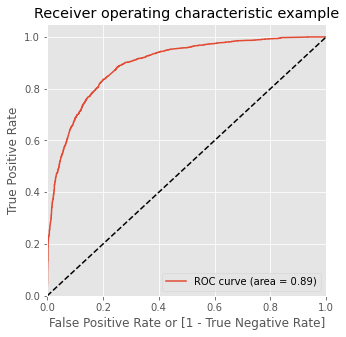

In [167]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

**Based on the ROC curve, we can see that the area under curve is 0.89, which is cloe to 1, meaning our model is predicting the Lead Conversions descently.**

### Finding Optimal Cutoff Probablity
**Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.**

#### Let's create columns with different probability cutoffs

In [168]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,641410,0,0.565455,1,1,1,1,1,1,1,0,0,0,0
6795,597687,0,0.098587,0,1,0,0,0,0,0,0,0,0,0
3516,626825,0,0.404394,0,1,1,1,1,1,0,0,0,0,0
8105,587928,0,0.841273,1,1,1,1,1,1,1,1,1,1,0
3934,622366,0,0.168349,0,1,1,0,0,0,0,0,0,0,0


#### Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

In [169]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.640693,0.969992,0.437781
0.2,0.2,0.767934,0.913625,0.678161
0.3,0.3,0.801175,0.871046,0.758121
0.4,0.4,0.817873,0.779805,0.841329
0.5,0.5,0.816945,0.703974,0.886557
0.6,0.6,0.812307,0.641525,0.917541
0.7,0.7,0.792826,0.540552,0.948276
0.8,0.8,0.770099,0.444850,0.970515
0.9,0.9,0.721088,0.289943,0.986757


#### Let's plot accuracy sensitivity and specificity for various probabilities.

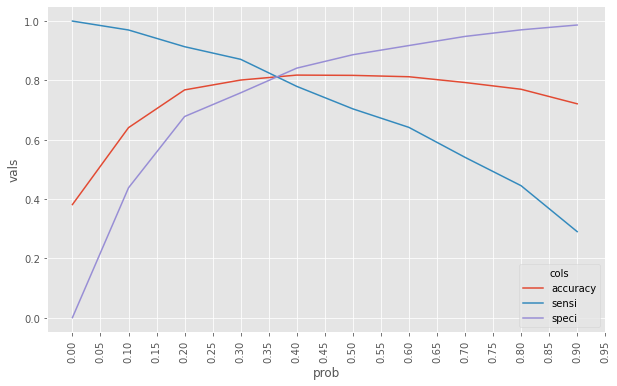

In [170]:
plt.figure(figsize=[10,6])
df = cutoff_df.melt('prob', var_name='cols', value_name='vals')
sns.lineplot(x="prob", y="vals", hue='cols', data=df)
#cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
#plt.xticks([0.0,0.001,0.002,0.003,0.004,0.005,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.351,0.352,0.353,0.354,0.355,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9])
plt.xticks(list(np.arange(0.0,1.0,0.05)), rotation=90)

plt.show()

**We see that somewhere between 0.35 and 0.4, the accuracy sensitivity and specificity intersects, an hence this is our optimal cutoff probablity. Lets take the optimal probablity as 0.36**

### Taking a cutoff probablity of 0.36, and making predictions

In [171]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1871,641410,0,0.565455,1,1,1,1,1,1,1,0,0,0,0,1
6795,597687,0,0.098587,0,1,0,0,0,0,0,0,0,0,0,0
3516,626825,0,0.404394,0,1,1,1,1,1,0,0,0,0,0,1
8105,587928,0,0.841273,1,1,1,1,1,1,1,1,1,1,0,1
3934,622366,0,0.168349,0,1,1,0,0,0,0,0,0,0,0,0


In [172]:
# Dropping irrelevant columns
y_train_pred_final.drop(['Predicted',0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], inplace=True, axis=1)

In [173]:
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
1871,641410,0,0.565455,1
6795,597687,0,0.098587,0
3516,626825,0,0.404394,1
8105,587928,0,0.841273,1
3934,622366,0,0.168349,0


### Let's check the overall accuracy for cuttoff probablity of 0.36

In [174]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8133889919604206

**Model accuracy is still good with 81.33%.**

### Creating confusion metrics for new cutoff probablity of 0.36

In [175]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3274,  728],
       [ 479, 1987]], dtype=int64)

In [176]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Let's see the sensitivity of our logistic regression model

In [177]:
TP / float(TP+FN)

0.8057583130575832

**The sensitivity of the model has now increased from 70.39% to 80.57% with cuttoff probablity of 0.36.**

#### Let us calculate specificity

In [178]:
TN / float(TN+FP)

0.8180909545227386

**The specificity has decreased from 88.65%(cuttoff prob of 0.5) to 81.8%(with cutoff prob of 0.36), but still the specificity is good.**

#### Positive predictive value 

In [179]:
print (TP / float(TP+FP))

0.7318600368324125


#### Negative predictive value

In [180]:
print (TN / float(TN+ FN))

0.8723687716493472


## Precision and Recall

In [181]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [182]:
# Precission
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7318600368324125

In [183]:
# Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8057583130575832

#### F1-Score
The F1 score can be interpreted as a weighted average of the precision and
    recall, where an F1 score reaches its best value at 1 and worst score at 0.
    The relative contribution of precision and recall to the F1 score are
    equal. The formula for the F1 score is::
    
        F1 = 2 * (precision * recall) / (precision + recall)

In [184]:
f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7670333912372129

**Overall our model has a good Precision, Recall and F1 score.**

### Adding the Lead Score column

In [185]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [186]:
y_train_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted,Lead Score
1871,641410,0,0.565455,1,57
6795,597687,0,0.098587,0,10
3516,626825,0,0.404394,1,40
8105,587928,0,0.841273,1,84
3934,622366,0,0.168349,0,17


# 7. Making predictions on Test Set

In [187]:
X_test.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,LeadOrigin_landing page submission,LeadOrigin_lead add form,LeadOrigin_lead import,LeadOrigin_quick add form,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel,LastActivity_converted to lead,LastActivity_email bounced,LastActivity_email link clicked,LastActivity_email marked spam,LastActivity_email opened,LastActivity_email received,LastActivity_form submitted on website,LastActivity_had a phone conversation,LastActivity_olark chat conversation,LastActivity_page visited on website,LastActivity_resubscribed to emails,LastActivity_sms sent,LastActivity_unreachable,LastActivity_unsubscribed,LastActivity_view in browser link clicked,LastActivity_visited booth in tradeshow,Country_india,Country_not available,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not available,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,CurrentOccupation_housewife,CurrentOccupation_not available,CurrentOccupation_other,CurrentOccupation_student,CurrentOccupation_unemployed,CurrentOccupation_working professional,CourseChooseMatterMost_flexibility & convenience,CourseChooseMatterMost_not available,CourseChooseMatterMost_other,LastNotableActivity_email bounced,LastNotableActivity_email link clicked,LastNotableActivity_email marked spam,LastNotableActivity_email opened,LastNotableActivity_email received,LastNotableActivity_form submitted on website,LastNotableActivity_had a phone conversation,LastNotableActivity_modified,LastNotableActivity_olark chat conversation,LastNotableActivity_page visited on website,LastNotableActivity_resubscribed to emails,LastNotableActivity_sms sent,LastNotableActivity_unreachable,LastNotableActivity_unsubscribed,LastNotableActivity_view in browser link clicked
4269,619003,0,0,8.0,1011,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,636884,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,590281,0,0,5.0,59,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,579892,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4359,617929,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

## 7.1 Scaling the Numerical variables

In [188]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(
    X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [189]:
X_test.describe()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,LeadOrigin_landing page submission,LeadOrigin_lead add form,LeadOrigin_lead import,LeadOrigin_quick add form,LeadSource_blog,LeadSource_click2call,LeadSource_direct traffic,LeadSource_facebook,LeadSource_google,LeadSource_live chat,LeadSource_nc_edm,LeadSource_olark chat,LeadSource_organic search,LeadSource_pay per click ads,LeadSource_press_release,LeadSource_reference,LeadSource_referral sites,LeadSource_social media,LeadSource_testone,LeadSource_welearn,LeadSource_welearnblog_home,LeadSource_welingak website,LeadSource_youtubechannel,LastActivity_converted to lead,LastActivity_email bounced,LastActivity_email link clicked,LastActivity_email marked spam,LastActivity_email opened,LastActivity_email received,LastActivity_form submitted on website,LastActivity_had a phone conversation,LastActivity_olark chat conversation,LastActivity_page visited on website,LastActivity_resubscribed to emails,LastActivity_sms sent,LastActivity_unreachable,LastActivity_unsubscribed,LastActivity_view in browser link clicked,LastActivity_visited booth in tradeshow,Country_india,Country_not available,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,Specialization_healthcare management,Specialization_hospitality management,Specialization_human resource management,Specialization_international business,Specialization_it projects management,Specialization_marketing management,Specialization_media and advertising,Specialization_not available,Specialization_operations management,Specialization_retail management,Specialization_rural and agribusiness,Specialization_services excellence,Specialization_supply chain management,Specialization_travel and tourism,CurrentOccupation_housewife,CurrentOccupation_not available,CurrentOccupation_other,CurrentOccupation_student,CurrentOccupation_unemployed,CurrentOccupation_working professional,CourseChooseMatterMost_flexibility & convenience,CourseChooseMatterMost_not available,CourseChooseMatterMost_other,LastNotableActivity_email bounced,LastNotableActivity_email link clicked,LastNotableActivity_email marked spam,LastNotableActivity_email opened,LastNotableActivity_email received,LastNotableActivity_form submitted on website,LastNotableActivity_had a phone conversation,LastNotableActivity_modified,LastNotableActivity_olark chat conversation,LastNotableActivity_page visited on website,LastNotableActivity_resubscribed to emails,LastNotableActivity_sms sent,LastNotableActivity_unreachable,LastNotableActivity_unsubscribed,LastNotableActivity_view in browser link clicked
count,2772.000000,2772.000000,2772.0,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.0,2772.0,2772.0,2772.000000,2772.0,2772.0,2772.0,2772.0,2772.0,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.0,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.0,2772.000000,2772.000000,2772.0,2772.0,2772.000000,2772.000000,2772.0,2772.000000,2772.0,2772.0,2772.000000,2772.0,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.00000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.000000,2772.0,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.0,2772.000000,2772.000000,2772.000000,2772.0

### Taking look at the col used in the final model

In [190]:
X_test[selected_col].head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_landing page submission,LeadOrigin_lead add form,LeadOrigin_lead import,LeadSource_welingak website,LastActivity_olark chat conversation,LastActivity_sms sent,Country_not available,Specialization_hospitality management,Specialization_not available,CurrentOccupation_working professional,CourseChooseMatterMost_not available,LastNotableActivity_had a phone conversation,LastNotableActivity_modified,LastNotableActivity_unreachable
4269,0,0.470588,0.444982,0,0,0,0,0,1,0,0,1,0,1,0,0,0
2376,0,0.000000,0.000000,0,1,0,0,0,1,1,0,1,0,0,0,0,0
7766,0,0.294118,0.025968,0,0,0,0,0,0,0,0,0,1,0,0,0,1
9199,0,0.000000,0.000000,0,0,0,0,1,0,1,0,1,0,0,0,1,0
4359,0,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0


# 7.2 Making predictions

In [191]:
y_test_pred = res.predict(sm.add_constant(X_test[selected_col]))

In [192]:
y_test_pred.head()

4269    0.613249
2376    0.900716
7766    0.966740
9199    0.081565
4359    0.885305
dtype: float64

### Creating the Dataframe for predictions of test set

In [193]:
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df.head()

,0
4269,0.613249
2376,0.900716
7766,0.966740
9199,0.081565
4359,0.885305


In [194]:
y_test_pred_df['Lead Number'] = X_test['Lead Number']
y_test_pred_df.rename(columns={ 0 : 'Converted_Prob'},inplace=True)
y_test_pred_df['Converted'] = y_test.values

In [195]:
y_test_pred_df.head()

,Converted_Prob,Lead Number,Converted
4269,0.613249,619003,1
2376,0.900716,636884,1
7766,0.966740,590281,1
9199,0.081565,579892,0
4359,0.885305,617929,1


### Predicting Conversions using the cutoff probablity of sentitivity/specificity tradeoff(Cutoff prob 0.36)

In [196]:
y_test_pred_df['final_predicted'] = y_test_pred_df.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [197]:
y_test_pred_df.head()

,Converted_Prob,Lead Number,Converted,final_predicted
4269,0.613249,619003,1,1
2376,0.900716,636884,1,1
7766,0.966740,590281,1,1
9199,0.081565,579892,0,0
4359,0.885305,617929,1,1


### Checking overall accuracy of model on test set

In [198]:
metrics.accuracy_score(y_test_pred_df.Converted, y_test_pred_df.final_predicted)

0.8142135642135642

**Overall accuracy is around 81.42%, which is close to that on the train set(accuracy 81.33%).**

### Creating confusion matrix for test set

In [199]:
confusion2 = metrics.confusion_matrix(y_test_pred_df.Converted, y_test_pred_df.final_predicted )
confusion2

array([[1380,  297],
       [ 218,  877]], dtype=int64)

### Creating TP,TN,FP,FN

In [200]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Let's see the sensitivity of our logistic regression model on test set

In [201]:
TP / float(TP+FN)

0.8009132420091324

#### Sensitivity has also droped from 80.57% on train set to 80.09% on test set, but again drop is not much significant.

### Let us calculate specificity as well

In [202]:
TN / float(TN+FP)

0.8228980322003577

#### Specificity has also increase from 81.8% on train set to 82.28% on test set.

#### Positive predictive value 

In [203]:
print (TP / float(TP+FP))

0.7470187393526405


#### Negative predictive value

In [204]:
print (TN / float(TN+ FN))

0.8635794743429287


#### Precission

In [205]:
precision_score(y_test_pred_df.Converted, y_test_pred_df.final_predicted)

0.7470187393526405

#### Recall

In [206]:
recall_score(y_test_pred_df.Converted, y_test_pred_df.final_predicted)

0.8009132420091324

#### F1-Score

In [207]:
f1_score(y_test_pred_df.Converted, y_test_pred_df.final_predicted)

0.7730277655354781

### We see all the metrices calculated above for test set are descent.
### Hence our model is performing very well on the test data as well.

## 7.3 Adding the Lead Score for Test Set

In [208]:
y_test_pred_df['Lead Score'] = y_test_pred_df.Converted_Prob.map( lambda x: round(x*100))

In [209]:
y_test_pred_df.head()

,Converted_Prob,Lead Number,Converted,final_predicted,Lead Score
4269,0.613249,619003,1,1,61
2376,0.900716,636884,1,1,90
7766,0.966740,590281,1,1,97
9199,0.081565,579892,0,0,8
4359,0.885305,617929,1,1,89


# 8. Final Observations

## Train Data : 
- **Accuracy** : 81.33%
- **Sensitivity/Recall** : 80.57%
- **Specificity** : 81.80%
- **Precision** : 73.18%
- **F1 Score** : 0.767

## Test Data: 
- **Accuracy** : 81.42%
- **Sensitivity/Recall** : 80.09%
- **Specificity** : 82.28%
- **Precision** : 74.70%
- **F1 Score** : 0.773

### The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model.